In [ ]:
!pip install --upgrade pip #upgrade pip package installer
!pip install scikit-learn --upgrade #upgrade scikit-learn package
!pip install numpy --upgrade #upgrade numpy package
!pip install --upgrade matplotlib # Κάνουμε update την matplotlib
!pip install -U imbalanced-learn6
!pip install delayed6

Ονομ/νυμο: **Βασιλική Παπαγεωργίου-Τσακανικα**   ΑΜ: **03116673**

# Μέρος 1. UCI dataset (Landsat Satellite)
### Σύντομη παρουσίαση: 
Το Data Set "Statlog (Landsat Satellite)" περιέχει δεδομένα σε μια δορυφορική εικόνα. <br>
Η κάθε γραμμή αποτελείται από πολυφασματικές τιμές pixel σε γειτονιές 3x3 σε μια δορυφορική εικόνα και την ταξινόμηση που σχετίζεται με το κεντρικό pixel σε κάθε γειτονιά.<br>
Στόχος είναι να προβλεφθεί αυτή η ταξινόμηση!
<br>
Δεν χρειάστηκε να κάνουμε μετατροπές στα αρχεία plain text μόνο να εννώσουμε τα δύο αρχεία σε ένα ώστε να ορίσουμε από την αρχή τα train και test sets. 
* Πλήθος δειγμάτων: 6435
* Πλήθος χαρακτηριστικών: 36
* Είδος χαρακτηριστικών: Ακέραιοι (Integers) 
* Μη διατεταγμένα χαρακτηριστικά: Οχι

Δεν υπάρχουν επικεφαλίδες ή αρίθμηση γραμμών. <br>
Οι ετικέτες των κλάσεων βρίσκονται στην τελευταία κολώνα των δεδομένων (με αρίθμηση από το μηδέν στη θέση 36) και είναι οι εξής: 
1. red soil
2. cotton crop
3. grey soil
4. damp grey soil
5. soil with vegetation stubble
6. mixture class (all types present)
7. very damp grey soil

Παρατηρούμε πως από την κλάση 6 (mixture class) δεν έχουμε κανένα δείγμα άρα για την ταξινόμηση δεν μας επηρεάζει. 

#### Προετοιμασία:
Εκτός από τις κλάσεις που κρατήσαμε από την τελευταία κολώνα των δεδομένων, οι υπόλοιπες κολώνες (0 εως και 35) αποτελούν τα χαρακτηριστικά του dataset. Δοκιμάσαμε να κρατήσουμε και μόνο τα κεντρικά pixels αφου αυτά καθορίζουν την ταξινόμηση, ωστόσο με το σύνολο των 36 χαρακτηριστικών είχαμε καλύτερες μετρικές απόδοσης. <br>
Τέλος διαχωρίζουμε το σύνολο δεδομένων σε σύνολο εκπαίδευσης (train set) και σύνολο (test set) με 30% των δειγμάτων στο test set.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
sat = pd.read_csv("//content/sat.csv",sep=' ', header=None)

classNum = sat.iloc[:, 36] # τα labels είναι στη 36 κολώνα
central_pixels = sat.iloc[:, 16:20] # τα central pixels είναι στις κολώνες 16 με 19
pixels = sat.iloc[:, 0:36] # τα central pixels είναι στις κολώνες 16 με 19
np_pixels = pixels.values 
np_central_pixels = central_pixels.values 
np_classNum = classNum.values 
# print(np.array_equal(central_pixels, np_central_pixels))
# print(np.array_equal(classNum, np_classNum))

from sklearn.model_selection import train_test_split
#Split our data
train, test, train_labels, test_labels = train_test_split(np_pixels, classNum, test_size=0.3)

## Απουσιάζουσες τιμές χαρακτηριστικών

Επειδή τα datasets δημιουργούνται από μετρήσεις ή αντικείμενα του πραγματικού κόσμου, ίσως να υπάρχουν απουσιάζουσες τιμές κάποιων χαρακτηριστικών σε έναν αριθμό δειγμάτων, οπότε ελέγχουμε ως εξής:

In [ ]:
print("#NaN in our dataset = " + str(np.sum(np.sum(sat.isna()))))

#NaN in our dataset = 0


## Ισορροπημένο Dataset
Θεωρούμε ότι το dataset δεν είναι απόλυτα ισορροπημένο. Παρακάτω βλέπουμε τον αριθμό τον δειγμάτων που ανήκουν σε κάθε κατηγορία, υπάρχει μία απόκλιση ωστόσο αποφασίσαμε να δουλέψουμε με τις κλάσεις ως έχουν. 
Στη συνέχεια θα δοκιμάσουμε κάποιες μεθόδους ισορρόπησης για να πετύχουμε πιθανώς καλύτερα αποτελέσματα

In [ ]:
frequency = { 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0 }
#print(frequency)
for x in range(np_classNum.size):
    frequency[np_classNum[x]] = frequency[np_classNum[x]] + 1
print("The number of attributes in each class\n",frequency)
for x in range(1,8): frequency[x] = frequency[x]/6435
print("The percentage of attributes of each class\n", frequency)


The number of attributes in each class
 {1: 1533, 2: 703, 3: 1358, 4: 626, 5: 707, 6: 0, 7: 1508}
The percentage of attributes of each class
 {1: 0.23822843822843823, 2: 0.10924630924630925, 3: 0.21103341103341103, 4: 0.09728049728049729, 5: 0.10986790986790987, 6: 0.0, 7: 0.23434343434343435}


# Ταξινόμηση
### Στο UCI θα μελετήσουμε τους παρακάτω ταξινομητές:


## Dummy Classifiers
Θα δοκιμάσουμε πρώτα κάποιες πολύ απλές τακτικές ταξινόμησης. Η κλάση DummyClassifier δέχεται μια παράμετρο που καθορίζει την τακτική της ταξινόμησης ως εξής:
* “uniform”: προβλέπει τυχαία και ομοιόμορφα.
* “most_frequent”: προβλέπει πάντα την πιο συχνή κατηγορία στο training set.
* “stratified”: κάνει προβλέψεις διατηρώντας την κατανομή των κλάσεων στο training set.

## Gaussian Naive Bayes (GNB)
### Naive Bayes Classifier
H βασική ιδέα λειτουργίας του ταξινομητή είναι 
1. ο γνωστός νόμος του Bayes $$P(A\mid B)={\frac {P(B\mid A)\,P(A)}{P(B)}}$$ 
2. και η (Naive) υπόθεση ότι τα χαρακτηριστικά είναι όλα ανεξάρτητα μεταξύ τους. 

Με δεδομένα μια μεταβλητή κατηγορίας (κλάσης) $y$ και ένα εξαρτώμενο διάνυσμα χαρακτηριστικών $x_1$ μέχρι $x_n$, σύμφωνα με το θεώρημα του Bayes θα ισχύει 
$$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)}{P(x_1, \dots, x_n)}$$
Ισχύει ότι $P(x_1, \dots, x_i, \dots, x_n \mid y) =  \prod_{i=1}^{n} P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n)$ και κάνουμε την αφελή υπόθεση ότι το χαρακτηριστικό $x_i$ για κάθε $i$ εξαρτάται μόνο από την κλάση $y$ και όχι από οποιοδήποτε άλλο χαρακτηριστικό
$$P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y)$$
αυτό οδηγεί στην απλοποίηση
$$P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)}{P(x_1, \dots, x_n)}$$
Με δεδομένη είσοδο, το $P(x_1, \dots, x_n)$ είναι σταθερό. Συνεπώς μπορούμε να χρησιμοποιήσουμε τον ακόλουθο κανόνα ταξινόμησης $$P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)$$
$$\Downarrow$$
$$\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y)$$
Το $P(y)$ είναι η υπόθεσή μας και ισούται με τη σχετική συχνότητα της κλάσης $y$ στο training set. To $P(x_i \mid y)$ είναι η πιθανοφάνεια δηλαδή η πιθανότητα του δείγματος με δεδομένη την υπόθεσή μας και μπορεί επίσης να υπολογιστεί απλά από το training set. Οι διάφοροι Naive Bayes classifiers διαφοροποιούνται κυρίως από τις υποθέσεις που κάνουν ως προς την κατανομή $P(x_i \mid y)$. Η κλάση $\hat{y}$ που ανατίθεται σε ένα νέο δείγμα είναι αυτή που μεγιστοποιεί το δεξί μέλος της σχέσης.
 
### Gaussian Naive Bayes
Ο συγκεκριμένος ταξινομητής είναι ο Gaussian Naive Bayes. Πρακτικά, με τα δεδομένα του training set, για κάθε κλάση υπολογίζουμε τη μέση τιμή $\mu_y$ και τη διακύμανση $\sigma^2_y$ κάθε χαρακτηριστικού για τη συγκεκριμένη κλάση. <br>
Πρακτικά, όσο πιο κοντά στη μέση τιμή του (ως προς το σύνολο του train set) είναι ένα χαρακτηριστικό ενός δείγματος, τόσο πιο κοντά στη μοναδα θα είναι η πιθανοφάνεια του χαρκτηριστικού και αντιθετοαντίστροφα.
<> Οι παραμετρικοί ταξινομητές κάνουν κάποια υπόθεση για την κατανομή (των χαρακτηριστικών) των δεδομένων και την προσδιορίζουν μέσω παραμέτρων. Στην περίπτωση του Gaussian Naive Bayes, η υπόθεση είναι η κανονική κατανομή και οι παράμετροι είναι τα  μ  και  σ2  των χαρακτηριστικών



## k Nearest Neighbors Classifier (kNN)
O kNN είναι ένας μη παραμετρικός ταξινομητής βασισμένος σε παραδείγματα (instance-based). Η αρχή λειτουργίας του είναι πολύ απλή. Για ένα νέο δείγμα προς ταξινόμηση, πρώτα υπολογίζουμε τους k πλησιέστερους γείτονές του (στον ν-διάστατο χώρο των χαρακτηριστικών εισόδου) με βάση κάποια συνάρτηση απόστασης, συνήθως ευκλείδεια
$$d(x, x') = \sqrt{\left(x_1 - x'_1 \right)^2 + \left(x_2 - x'_2 \right)^2 + \dotsc + \left(x_n - x'_n \right)^2}$$
Η κλάση του νέου δείγματος θα είναι η κλάση της πλειοψηφίας των k γειτόνων (διαλέγουμε k περιττό γενικά), είτε απλά υπολογισμένη (άθροισμα) είτε (αντίστροφα) ζυγισμένη με βάση την απόσταση του κάθε γείτονα. 

Ο kNN δεν έχει πρακτικά φάση εκπαίδευσης. Ωστόσο, για να ταξινομήσουμε ένα νέο δείγμα στην φάση test,  πρέπει να συγκρίνουμε την απόστασή του με κάθε δείγμα του train set. Αυτό σημαίνει ότι για την ταξινόμηση είναι απαραίτητα όλα τα δείγματα εκπαίδευσης (εξού και η ονομασία "instance-based", ενώ στον Naive Bayes χρειαζόμαστε μόνο τις παραμέτρους $μ$ και $σ^2$). Αυτό σημαίνει ότι ο kNN είναι πιο απαιτητικός και σε χώρο (αποθήκευση όλων των δειγμάτων) και σε χρόνο (υπολογισμός όλων των αποστάσεων για κάθε νέο δείγμα).
### Υπερπαράμετρος k
Το k της γειτονιάς του kNN είναι μια υπερπαράμετρος του ταξινομητή. Μια άλλη υπερπαράμετρος για παράδειγμα είναι η συνάρτηση της απόστασης. Οι υπερπαράμετροι είναι επιλογές που γίνονται από τον σχεδιαστή του συστήματος και δεν μπορούμε να ξέρουμε τις βέλτιστες τιμές τους αν πρώτα δεν τις αξιολογήσουμε εμπειρικά σε δεδομένα.  Ένα άλλο παράδειγμα υπερπαραμέτρου είναι ο αριθμός των κρυφών νευρώνων σε ένα MLP. Στην περίπτωση του kNN το k ελέγχει το trade-off μεταξύ μεταξύ απόκλισης και διακύμνανσης.

Έαν θέσουμε μικρό k, πχ k=1 παίρνουμε ένα ταξινομητή με υψηλή διακύμανση και χαμηλή απόκληση. Ο ταξινομητής τείνει να αγνοεί τη συνολική κατανομή και αποφασίζει μόνο από το κοντινότερο δείγμα. Στην περίπτωση k=1 το σύνορο απόφασης (decision boundary) περνά από τις μεσοκάθετους γειτονικών δειγμάτων διαφορετικής κλάσης. 

Αν διαλέξουμε μεγαλύτερο k, φτιάχνουμε ένα ταξινομητή με χαμηλότερη διακύμανση και υψηλότερη απόκλιση. Θα ταξινομίσει λάθος περισσότερα αποκλίνοντα δείγματα (outliers) αλλά θα σέβεται περισσότερο τη συνολική κατανομή.



## Λογιστική Παλινδρόμηση (Logistic Regression)
### Γραμμική παλινδρόμηση
Η συνάρτηση της ευθείας είναι $y=mx+b$, όπου $m$ η κλίση της ευθείας και $b$ το σημείο τομής του άξονα $Y$. Στην περίπτωση όπου τα δεδομένα έχουν μία διάσταση (scalar), η διαχωριστική επιφάνεια (*η υπόθεση*) του ταξινομητή είναι μια απλή ευθεία, σύμφωνα με τον προηγούμενο τύπο. Η εύρεση των *εμπειρικών* $\hat{m}$ και $\hat{b}$ γίνεται με τη μέθοδο των ελαχίστων τετραγώνων.

### Από τη γραμμική στη λογιστική παλινδρόμηση
Σε περίπτωση που θα θέλαμε να μετατρέψουμε το πρόβλημα της παλινδρόμησης σε ένα πρόλβημα δυαδικής ταξινόμησης μια προσέγγιση θα ήταν να κοιτάξουμε το πεδίο τιμών της $y$ και να θέσουμε μια τιμή κατωφλιού $y_{thresh}$ για την οποία θα ισχύει $$\begin{align} y_{i} &=1 \text{, αν } y_i \geq y_{thresh} \text{ και }\\
y_{i} &=0 \text{ αλλιώς} \end{align}
$$
Για να λάβουμε τιμές στο διάσημα μεταξύ 0 και 1 θα βοηθήσει η λογιστική σιγμοειδής συνάρτηση ή απλά λογιστική συνάρτηση:
$$ f(x)={\frac {1}{1+e^{-x}}} .$$ 
#### Βελτιστοποίηση με κάθοδο κλίσης
Η μέθοδος βελτιστοποίησης που χρησιμοποιούμε κατά κανόνα στη μηχανική μάθηση είναι η κάθοδος κλίσης (gradient descent) ως προς κάθε διάσταση,
$$
\frac{\partial \text { Cost }}{\partial x_{ j}}=\frac{1}{n} \sum_{i=1}^{n}\left(\sigma\left(\beta x_{i}\right)-y_{i}\right) x_{i j},
$$
η οποία εγγυάται την εύρεση ενός τοπικού ελάχιστου.<br/>
Τα βάρη $β_j$ στη συνέχεια θα ανανεώνονται επαναληπτικά ως εξής:

$$ β_j  \gets β_j - \alpha \frac{1}{n} \sum_{i=1}^{n}\left(\sigma\left(\beta x_{i}\right)-y_{i}\right) x_{i j},$$

όπου $α$ ο ρυθμός μάθησης (learning rate), μέχρι την ικανοποίηση κάποιου κριτήρίου σύγκλισης.



In [ ]:
#importan for set up
accuracy = {}
scoreF1 = {}
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import itertools
from sklearn.metrics import confusion_matrix


#imports for emulators
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
import warnings 
warnings.filterwarnings('ignore') 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='saga', max_iter=100)

import numpy as np
import matplotlib.pyplot as plt

# plotting
def print_plot(class1,class2):
    N = 6  # number of groups
    ind = np.arange(N)  # group positions
    width = 0.35  # bar width

    fig, ax = plt.subplots()

    # bars for classifier 1-6
    p1 = ax.bar(ind, np.hstack(([class1])), width, color="green", edgecolor="k")
    p2 = ax.bar(
        ind + width,
        np.hstack(([class2])),
        width,
        color="lightgreen",
        edgecolor="k",
    )


    # plot annotations
    ax.set_xticks(ind + width)
    ax.set_xticklabels(
        [
            "uniform (random)",
            "most frequent",
            "stratified",
            "gaussian naive bayes",
            "k nearest neighbors",
            "logistic regression",
        ],
        rotation=40,
        ha="right",
    )
    plt.ylim([0, 1])
    plt.title("Classification accuracy & F1 score by different classifiers")
    plt.legend([p1[0], p2[0]], ["accuracy", "F1score"], loc="upper left")
    plt.show()

    
#metrics
from sklearn.metrics import classification_report
def print_report(y_test, y_pred, clf_name):
    labels = ['red soil', 'cotton crop', 'grey soil', 'damp grey soil', 'soil with vegetation stubble','very damp grey soil']
    print("Classification Report of " + clf_name +"\n")
    print(classification_report(y_test, y_pred, target_names=labels, zero_division= 0))
    
def print_metrics(accuracy, cv_scores, clf_name):
    print(clf_name)
    print("\nAccuracy: ", accuracy)
    print("\nCV scores: \n", cv_scores)



# plotting
def print_plot_optimize(class1,class2,class3,scoring):
    N = 3  # number of groups
    ind = np.arange(N)  # group positions
    width = 0.25  # bar width
    fig, ax = plt.subplots()

    # bars for classifier 1-6
    p1 = ax.bar(ind, np.hstack(([class1])), width, color="green", edgecolor="k")
    p2 = ax.bar(
        ind + width,
        np.hstack(([class2])),
        width,
        color="seagreen",
        edgecolor="k",
    )
    p3 = ax.bar(
        ind + width + width,
        np.hstack(([class3])),
        width,
        color="lightgreen",
        edgecolor="k",
    )


    # plot annotations
    
    ax.set_xticks(ind + width)
    ax.set_xticklabels(
        [
            "GNB",
            "kNN",
            "LR",
        ],
        rotation=0,
        ha="right",
    )
    plt.ylim([0, 1])
    plt.title(scoring +" Optimization by different classifiers")
    plt.legend([p1[0], p2[0], p3[0]], ["out of the box", "optimized by accuracy", "optimized by f1-macro"], loc="lower right")
    plt.show()



def plot_confusion_matrix(cm, classes,                  
                          title='Confusion matrix',
                          cmap=plt.cm.Blues, size = None):
  
    if size == 'big':
      plt.figure(figsize=(12,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()  
    plt.show()

In [ ]:
dummyUniform = DummyClassifier(strategy="uniform")
dummyMostFreq = DummyClassifier(strategy="most_frequent")
dummyStratified = DummyClassifier(strategy="stratified")

modelU = dummyUniform.fit(train, train_labels)
predsDummyU = dummyUniform.predict(test)
accuracy['uniform (random)'] = accuracy_score(test_labels, predsDummyU)
scoreF1['uniform (random)'] = precision_recall_fscore_support(test_labels, predsDummyU, average='macro', zero_division= 0)

modelM = dummyMostFreq.fit(train, train_labels)
predsDummyM = dummyMostFreq.predict(test)
accuracy['most frequent'] = accuracy_score(test_labels, predsDummyM)
scoreF1['most frequent'] = precision_recall_fscore_support(test_labels, predsDummyM, average='macro', zero_division= 0)

modelS = dummyStratified.fit(train, train_labels)
predsDummyS = dummyStratified.predict(test)
accuracy['stratified'] = accuracy_score(test_labels, predsDummyS)
scoreF1['stratified'] = precision_recall_fscore_support(test_labels, predsDummyS, average='macro', zero_division= 0)

In [ ]:
modelG = gnb.fit(train, train_labels.values.ravel())   #The ".values.ravel()" returns a contiguous flattened array
predsGNB = gnb.predict(test)
accuracy['gaussian naive bayes'] = accuracy_score(test_labels, predsGNB)
scoreF1['gaussian naive bayes'] = precision_recall_fscore_support(test_labels, predsGNB, average='macro', zero_division= 0)

In [ ]:
modelK = knn.fit(train, train_labels.values.ravel())   #The ".values.ravel()" returns a contiguous flattened array
predsKNN = knn.predict(test)
accuracy['k nearest neighbors'] = accuracy_score(test_labels, predsKNN)
scoreF1['k nearest neighbors'] = precision_recall_fscore_support(test_labels, predsKNN, average='macro', zero_division= 0)

In [ ]:
modelLR = lr.fit(train, train_labels.values.ravel())   #The ".values.ravel()" returns a contiguous flattened array
predsLR = lr.predict(test)
accuracy['logistic regression'] = accuracy_score(test_labels, predsLR)
scoreF1['logistic regression'] = precision_recall_fscore_support(test_labels, predsLR, average='macro', zero_division= 0)

Classification Accuracy 

k nearest neighbors 0.9135163127912999
gaussian naive bayes 0.8063179699637494
logistic regression 0.7954427757638529
most frequent 0.23096841015018124
stratified 0.17348524080787156
uniform (random) 0.15743138270326257

Classification F1 score 

k nearest neighbors 0.8965154532004048
gaussian naive bayes 0.7849136028814326
logistic regression 0.7343879487336782
uniform (random) 0.15293779245867078
stratified 0.15101046605756754
most frequent 0.06254382274575795

Classification Reports 

Classification Report of Uniform (random)

                              precision    recall  f1-score   support

                    red soil       0.22      0.14      0.17       446
                 cotton crop       0.10      0.15      0.12       232
                   grey soil       0.22      0.19      0.20       409
              damp grey soil       0.09      0.15      0.11       176
soil with vegetation stubble       0.13      0.19      0.15       218
         very dam

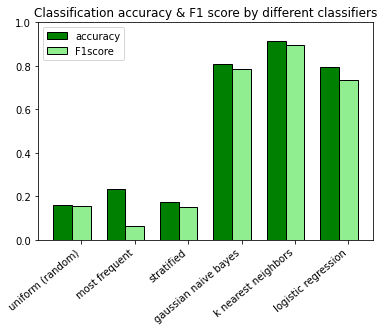

In [ ]:
#The scores for all pixels
print("Classification Accuracy \n")
sorted_accuracy =  [(k, accuracy[k]) for k in sorted(accuracy, key=accuracy.get, reverse=True)]
for k, v in sorted_accuracy:
  print(k,v)
print("\nClassification F1 score \n")
sorted_scoreF1 =  [(k, scoreF1[k]) for k in sorted(scoreF1, key=scoreF1.get, reverse=True)]
for k, v in sorted_scoreF1:
  print(k,v[2])

print("\nClassification Reports \n")
print_report(test_labels, predsDummyU,'Uniform (random)')
print_report(test_labels, predsDummyM,'Most Frequent')
print_report(test_labels, predsDummyS,'Stratified')
print_report(test_labels, predsGNB,'Gaussian Naive Bayes')
print_report(test_labels, predsKNN,'k Nearest Neighbors')
print_report(test_labels, predsLR,'Logistic Regression')

plotAccuracy =  [(accuracy[k]) for k in accuracy]
plotScoreF1 =  [(scoreF1[k][2]) for k in scoreF1]
#print(plotAccuracy)
#print(plotScoreF1)
print("\nThe plot for all pixels' scores:\n")
print_plot(plotAccuracy, plotScoreF1)

CENTRAL PIXELS 

Classification Accuracy 

k nearest neighbors 0.8394614189539099
gaussian naive bayes 0.7783531848783014
logistic regression 0.7327809425168307
most frequent 0.22941481097876748
stratified 0.18643190056965303
uniform (random) 0.16830657690315898

Classification F1 score 

k nearest neighbors 0.8120894596590285
gaussian naive bayes 0.7641657709100049
logistic regression 0.6535333423839622
uniform (random) 0.16432896517717885
stratified 0.16040887504550408
most frequent 0.06220162875596743

The plot for central pixels' scores:



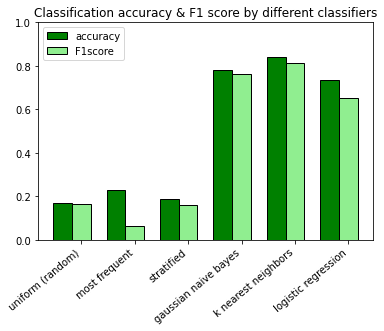

In [ ]:
#The scores for central pixels
print("CENTRAL PIXELS \n")
print("Classification Accuracy \n")
sorted_accuracy =  [(k, accuracy[k]) for k in sorted(accuracy, key=accuracy.get, reverse=True)]
for k, v in sorted_accuracy:
  print(k,v)
print("\nClassification F1 score \n")
sorted_scoreF1 =  [(k, scoreF1[k]) for k in sorted(scoreF1, key=scoreF1.get, reverse=True)]
for k, v in sorted_scoreF1:
  print(k,v[2])

plotAccuracy =  [(accuracy[k]) for k in accuracy]
plotScoreF1 =  [(scoreF1[k][2]) for k in scoreF1]
#print(plotAccuracy)
#print(plotScoreF1)
print("\nThe plot for central pixels' scores:\n")
print_plot(plotAccuracy, plotScoreF1)

### Παρατηρήσεις:
Γενικά οι dummy classifiers σε mutliclass προβλήματα εμφανίζουν πολύ χαμηλά σκορ, όπως και στην περίπτωση μας.
Παρατηρούμε ότι πετυχαίνει πολύ καλό σκορ precision και recall σε όλες τις κατηγορίες. Μόνο σε μία κατηγορία έχουμε μηδενικές τιμές καθώς επειδή έχουμε λίγα δεδομένα για τόσες πολλές κλάσεις και έτσι δεν τυχαίνει να γίνει κάποια πρόβλεψη έτσι ώστε ο παρανομαστής του precision και του recall να μην είνια μηδενικός. Το ίδιο συμβαίνει και σε πολλές περιπτώσεις στους dummy.
Βλέπουμε πως θέλουμε να αυξήσουμε το recall σε "damp grey soil" και "soil with vegetation stubble" κ. Ενώ το precision στο "damp grey soil" βλέπουμε σημαντική πτώση. <br> 
Τέλος να σημειωθεί πως δοκιμάσαμε να τρέξουμε τους ταξηνομιτές για την "4-αδα των μεσαίων pixel" αλλά και για το σύνολο των χαρακτηριστικών. Ωστόσο συνεχίσαμε με τα δεδομένα για το σύνολο των χαρακτηριστικών όχι μόνο γιατί έχει καλύτερες μετρικές αλλά και γιατί θεωρήσαμε ότι θα μπορούσαμε να δοκιμάσουμε κάποια άλλη μέθοδο μείωσης των στηλών.

# Βελτιστοποίηση
### Για όλους τους ταξινομητές βελτιστοποιήστε την επίδοσή τους μέσω των διαδικασιών:

* προεπεξεργασίας,
* ορισμού pipelines, και
* εύρεσης βέλτιστων υπερμαραμέτρων με αναζήτηση πλέγματος με διασταυρούμενη επικύρωση

Αφού εισάγαμε τα δεδομένα και κάναμε μια πρώτη επισκόπηση και τα φέραμε στη σωστή μορφοποίηση, περνάμε στο επόμενο στάδιο, αυτό της προεπεξεργασίας (data preprocessing). Σε πολλά προβλήματα ταξινόμησης (και machine learning γενικότερα) η προεπεξεργασία είναι ένα πολύ σημαντικό κομμάτι (και συχνά πολύ χρονοβόρο) ολόκληρης της διαδικασίας το οποίο όμως συχνά έχει πολύ μεγάλο αντίκτυπο στην επίδοση του συστήματος. 

Για το καλύτερο μοντέλο κάθε ταξινομητή, εκπαιδεύουμε στο σύνολο του train set και παρατηρούμε την επίδοσή του στο test set. Για τα βέλτιστα μοντέλα, κρατάμε τους χρόνους train και test.

## Σχήμα διασταυρούμενης επικύρωσης (Cross Validation)
#### Για όλα τα πειράματα θα χρησιμοποιήσετε 10-fold cross-validation.
Στο Cross Validation αρχικά χωρίζουμε το training set σε έναν αριθμό "πτυχών" (folds). Συνηθισμένες τιμές είναι το 5 και το 10 (εδώ 10-fold CV). Στη συνέχεια, για κάθε k-fold, θεωρούμε ότι τα k μείον 1 folds είναι training set και ότι το fold που αφήσαμε έξω είναι το test set. Υπολογίζουμε τη μετρική σφάλματός μας στο test set που ορίζει το fold. Επαναλαμβάνουμε τη διαδικασία για τα k folds για κάθε τιμή των υπερπαραμέτρων και υπολογίζουμε τη μέση τιμή της μετρικής του σφάλματος. Με αυτό τον τρόπο, αφενός είμαστε αμερόληπτοι στην αξιολόγηση αφήνοντας τελείως έξω το test set και αφετέρου χρησιμοποιούμε αποτελεσματικά τα δεδομένα εκπαίδευσης: τα χρησιμοποιούμε όλα και παίρνοντας τη μέση τιμή εξαλείφουμε πιθανές ανωμαλίες στα δεδομένα.
<br> 
To Scikit Learn έχει συναρτήσεις για να κάνει αυτόματα cross validation (να ορίζει folds και να  υπολογίζει τιμές και μέσους όρους). Θα κάνουμε 10 fold cross validation. 
<br> 
 ```python
 from sklearn.model_selection import cross_validate
 cv_results = cross_validate(estimator, train , train_lebels, cv=10)
 print(cv_results['test_score']) 
 ```

## Διαδικασία Προεπεξεργασίας
### Μείωση διαστάσεων εισόδου με επιλογή χαρακτηριστικών (VarianceThreshold)
Αν η διακύμανση ενός χαρακτηριστικού εισόδου είναι πολύ χαμηλή, δεν μπορεί να προσφέρει σημαντικά στη διαχωριστική ικανότητα του ταξινομητή. Στην περίπτωση που η διακύμανση είναι 0, δηλαδή το χαρακτηριστικό έχει σταθερή τιμή για όλα τα δείγματα εκπαίδευσης, μπορεί να δυσκολέψει άλλες διαδικασίες της προεπεξεργασίας όπως η κανονικοποίηση των χαρακτηριστικών. 

Μπορούμε να χρησιμοποιήσουμε τη συνάρτηση **VarianceThreshold** για να αφαιρέσουμε τα  χαρακτηριστικά στο training set που έχουν μηδενική διακύμανση (default) ή πολύ χαμηλή. Πρέπει επίσης να πάρουμε μια μάσκα (index) των χαρακτηριστικών που επιλέγουμε, ώστε να την εφαρμόσουμε και στα δεδομένα train ώστε να έχουν τις ίδιες διαστάσεις.  

Ενώ οι σταθερές τιμές πρέπει να αφαιρούνται κατά κανόνα πάντα, μπορεί κανείς να δοκιμάσει με μεγαλύτερα κατώφλια και να αξιολογηθεί η επίδραση που έχει η περαιτέρω μείωση των διαστάσεων στην επίδοση του ταξινομητή. Για να καταλάβουμε τι τιμές μπορούμε να δοκιμάζουμε στο κατώφλι πρέπει να δούμε τη διακύμανση όλων των μεταβλητών. 

In [ ]:
X_train = train
X_test = test
#X_train = X_train_minmax
#X_test = X_test_minmax
Y_train = train_labels
Y_test = test_labels
Xvar = np.var(X_train, axis=0)
print("The VAR of all variables: ")
print(Xvar)
#print(X_train_minmax)

The VAR of all variables: 
[184.99349365 516.66131068 275.23200672 349.26959951 182.47975433
 512.23228218 274.74355886 351.22344215 179.38598091 512.97356874
 275.91066314 352.29050159 185.84477958 516.55022494 278.5943341
 351.44339095 183.00513531 514.66357825 276.57210484 352.05696491
 179.98927966 514.05477251 278.20872073 355.83558048 184.90270342
 515.9238017  277.09387097 358.90463376 183.02854932 518.01805066
 279.42625205 357.72814692 180.37528414 517.41259851 277.41648395
 357.50440062]


In [ ]:
from sklearn.feature_selection import VarianceThreshold

# αρχικοποιούμε έναν selector
selector = VarianceThreshold(threshold=200)
X_train_reduced = selector.fit_transform(X_train)
X_test_reduced = selector.transform(X_test)
mask = selector.get_support()

print(X_train.shape)
print(X_test_reduced.shape)

(4504, 36)
(1931, 27)


In [ ]:
# Testing with GNB 
from sklearn.model_selection import cross_validate

print("GNB Classifier:\n")
gnb.fit(X_train, Y_train.values.ravel())   #The ".values.ravel()" returns a contiguous flattened array
predict = gnb.predict(X_test)
cv_results = cross_validate(gnb, X_train , Y_train, cv=10)
print("Score on test No Reduce")
print("accuracy_score")
print(accuracy_score(Y_test, predict))
print("cv_results")
print(cv_results['test_score'])


gnb.fit(X_train_reduced, Y_train.values.ravel())   #The ".values.ravel()" returns a contiguous flattened array
predict_reduced = gnb.predict(X_test_reduced)
cv_results_reduced = cross_validate(gnb, X_train_reduced , Y_train, cv=10)
print("\nScore on test Reduced")
print("accuracy_score")
print(accuracy_score(Y_test, predict_reduced))
print("cv_results")
print(cv_results_reduced['test_score'])

GNB Classifier:

Score on test No Reduce
accuracy_score
0.8078715691351631
cv_results
[0.78713969 0.79822616 0.78935698 0.79379157 0.81777778 0.74444444
 0.79777778 0.78666667 0.79333333 0.81333333]

Score on test Reduced
accuracy_score
0.6545831175556707
cv_results
[0.63192905 0.62971175 0.63414634 0.66075388 0.68666667 0.62444444
 0.66666667 0.65111111 0.63777778 0.67111111]


In [ ]:
# Testing with GNB 
from sklearn.model_selection import cross_validate

print("kNN Classifier:\n")
knn.fit(X_train, Y_train.values.ravel())   #The ".values.ravel()" returns a contiguous flattened array
predict = knn.predict(X_test)
cv_results = cross_validate(gnb, X_train , Y_train, cv=10)
print("Score on test Out of the Box")
print("accuracy_score")
print(accuracy_score(Y_test, predict))
print("cv_results")
print(cv_results['test_score'])


knn.fit(X_train_reduced, Y_train.values.ravel())   #The ".values.ravel()" returns a contiguous flattened array
predict_reduced = knn.predict(X_test_reduced)
cv_results_reduced = cross_validate(gnb, X_train_reduced , Y_train, cv=10)
print("\nScore on test Reduced")
print("accuracy_score")
print(accuracy_score(Y_test, predict_reduced))
print("cv_results")
print(cv_results_reduced['test_score'])

kNN Classifier:

Score on test Out of the Box
accuracy_score
0.9114448472294148
cv_results
[0.78713969 0.79822616 0.78935698 0.79379157 0.81777778 0.74444444
 0.79777778 0.78666667 0.79333333 0.81333333]

Score on test Reduced
accuracy_score
0.8839979285344381
cv_results
[0.63192905 0.62971175 0.63414634 0.66075388 0.68666667 0.62444444
 0.66666667 0.65111111 0.63777778 0.67111111]


In [ ]:
from sklearn.model_selection import cross_validate

print("LR Classifier:\n")
lr.fit(X_train, Y_train.values.ravel())   #The ".values.ravel()" returns a contiguous flattened array
predict = lr.predict(X_test)
cv_results = cross_validate(gnb, X_train , Y_train, cv=10)
print("Score on test Out of the Box")
print("accuracy_score")
print(accuracy_score(Y_test, predict))
print("cv_results")
print(cv_results['test_score'])


lr.fit(X_train_reduced, Y_train.values.ravel())   #The ".values.ravel()" returns a contiguous flattened array
predict_reduced = lr.predict(X_test_reduced)
cv_results_reduced = cross_validate(gnb, X_train_reduced , Y_train, cv=10)
print("\nScore on test Reduced")
print("accuracy_score")
print(accuracy_score(Y_test, predict_reduced))
print("cv_results")
print(cv_results_reduced['test_score'])

LR Classifier:

Score on test Out of the Box
accuracy_score
0.8026929052304506
cv_results
[0.78713969 0.79822616 0.78935698 0.79379157 0.81777778 0.74444444
 0.79777778 0.78666667 0.79333333 0.81333333]

Score on test Reduced
accuracy_score
0.6302433972035215
cv_results
[0.63192905 0.62971175 0.63414634 0.66075388 0.68666667 0.62444444
 0.66666667 0.65111111 0.63777778 0.67111111]


### Παρατηρήσεις: 
Από τα παρακάτω αποτελέσματα θα δούμε πως η "Μείωση διαστάσεων" δεν βοήθησε στην ορθότητα της Ταξινόμησης. 
Δοκιμάστηκαν και κανονικοποιημένα δεδομένα αλλά δεν φάνηκε να ευνοούν τις συνθήκες. 

## Κανονικοποίηση χαρακτηριστικών

Χαρακτηριστικά με πολύ μεγάλες διαφορές στις απόλυτες τιμές τους μπορούν να προκαλέσουν προβλήματα στην εκπαίδευση και να δώσουν ταξινομητές με μη βέλτιστη απόδοση. 

Η κανονικοποίηση των χαρακτηριστικών μπορεί να γίνει με 2 βασικούς τρόπους, γνωστούς και από τη στατιστική. Με την διαίρεση με τη διαφορά μεγίστου-ελαχίστου (feature scaling) οπότε οι τιμές όλων των χαρακτηριστικών κλιμακώνονται γραμμικά στο διάστημα [0,1] ή με το z-score (ή standard score) του κάθε χαρακτηριστικού (standardization), που κάνει το χαρακτηριστικό να έχει μέση τιμή μηδέν και διακύμανση μονάδα, σαν την κανονική κατανομή. 

Η μετατροπή μεγίστου ελαχίστου γίνεται με τον τύπο: $$X' = {X - X_{min} \over X_{max} - X_{min}}$$Η μετατροπή σε standard score γίνεται με τον τύπο: $$z = {X- \mu \over \sigma}$$ όπου: $μ$ είναι η μέση τιμή του χαρακτηριστικού και $σ$ η απόκλιση. 

H μετατροπή σε standard score είναι απαραίτητη σε πολλούς ταξινομητές για να συμπεριφερθούν σωστά. Επίσης είναι πιο ανθεκτική από την min-max σε τιμές outliers δηλαδή σποραδικές τιμές που είναι πολύ μακριά απο τη μέση τιμή και τις υπόλοιπες τιμές του χαρακτηριστικού (η min-max θα συμπιέσει τις περισσότερες τιμές σε ένα μικρό διάστημα)

Από την άλλη, η κλιμάκωση σε [0,1] είναι λιγότερο ευαίσθητη σε πολύ μικρές αποκλίσεις και επίσης σε αραιά (sparse) διανύσματα χαρακτηριστικών (δηλαδή με πολλές μηδενικές τιμές) η εφαρμογή της διατηρεί τα μηδέν, κάτι που μπορεί να είναι καθοριστικό για την ταχύτητα εκπαίδευσης.

In [ ]:
#import matplotlib.pyplot as plt
#from scipy import stats as st
from sklearn import preprocessing
import numpy as np

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)
#print(X_test_minmax)

standar_scaler = preprocessing.StandardScaler()
X_train_standar = standar_scaler.fit_transform(X_train)
X_test_standar = standar_scaler.transform(X_test)
#print(X_test_standar)



In [ ]:
# Testing with GNB 
from sklearn.model_selection import cross_validate

print("GNB Classifier:\n")
gnb.fit(X_train, Y_train.values.ravel())   #The ".values.ravel()" returns a contiguous flattened array
predict = gnb.predict(X_test)
cv_results = cross_validate(gnb, X_train , Y_train, cv=10)
print("Score on test Out of the Box")
print("accuracy_score")
print(accuracy_score(Y_test, predict))
print("cv_results")
print(cv_results['test_score'])


gnb.fit(X_train_minmax, Y_train.values.ravel())   #The ".values.ravel()" returns a contiguous flattened array
predict_minmax = gnb.predict(X_test_minmax)
cv_results_minmax = cross_validate(gnb, X_train_minmax , Y_train, cv=10)
print("\nScore on test MinMax")
print("accuracy_score")
print(accuracy_score(Y_test, predict_minmax))
print("cv_results")
print(cv_results_minmax['test_score'])

gnb.fit(X_train_standar, Y_train.values.ravel())   #The ".values.ravel()" returns a contiguous flattened array
predict_standar = gnb.predict(X_test_standar)
cv_results_standar = cross_validate(gnb, X_train_standar , Y_train, cv=10)
print("\nScore on test Standar")
print("accuracy_score")
print(accuracy_score(Y_test, predict_standar))
print("cv_results")
print(cv_results_standar['test_score'])

GNB Classifier:

Score on test Out of the Box
accuracy_score
0.8078715691351631
cv_results
[0.78713969 0.79822616 0.78935698 0.79379157 0.81777778 0.74444444
 0.79777778 0.78666667 0.79333333 0.81333333]

Score on test MinMax
accuracy_score
0.8078715691351631
cv_results
[0.78713969 0.79822616 0.78935698 0.79379157 0.81777778 0.74444444
 0.79777778 0.78666667 0.79333333 0.81333333]

Score on test Standar
accuracy_score
0.8078715691351631
cv_results
[0.78713969 0.79822616 0.78935698 0.79379157 0.81777778 0.74444444
 0.79777778 0.78666667 0.79333333 0.81333333]


In [ ]:
# Testing with kΝΝ
from sklearn.model_selection import cross_validate

print("kNN Classifier:\n")
knn.fit(X_train, Y_train.values.ravel())   #The ".values.ravel()" returns a contiguous flattened array
predict = knn.predict(X_test)
cv_results = cross_validate(gnb, X_train , Y_train, cv=10)
print("Score on test Out of the Box")
print("accuracy_score")
print(accuracy_score(Y_test, predict))
print("cv_results")
print(cv_results['test_score'])


knn.fit(X_train_minmax, Y_train.values.ravel())   #The ".values.ravel()" returns a contiguous flattened array
predict_minmax = knn.predict(X_test_minmax)
cv_results_minmax = cross_validate(gnb, X_train_minmax , Y_train, cv=10)
print("\nScore on test MinMax")
print("accuracy_score")
print(accuracy_score(Y_test, predict_minmax))
print("cv_results")
print(cv_results_minmax['test_score'])

knn.fit(X_train_standar, Y_train.values.ravel())   #The ".values.ravel()" returns a contiguous flattened array
predict_standar = knn.predict(X_test_standar)
cv_results_standar = cross_validate(gnb, X_train_standar , Y_train, cv=10)
print("\nScore on test Standar")
print("accuracy_score")
print(accuracy_score(Y_test, predict_standar))
print("cv_results")
print(cv_results_standar['test_score'])

kNN Classifier:

Score on test Out of the Box
accuracy_score
0.9114448472294148
cv_results
[0.78713969 0.79822616 0.78935698 0.79379157 0.81777778 0.74444444
 0.79777778 0.78666667 0.79333333 0.81333333]

Score on test MinMax
accuracy_score
0.9104091144484723
cv_results
[0.78713969 0.79822616 0.78935698 0.79379157 0.81777778 0.74444444
 0.79777778 0.78666667 0.79333333 0.81333333]

Score on test Standar
accuracy_score
0.909891248058001
cv_results
[0.78713969 0.79822616 0.78935698 0.79379157 0.81777778 0.74444444
 0.79777778 0.78666667 0.79333333 0.81333333]


In [ ]:
from sklearn.model_selection import cross_validate

print("LR Classifier:\n")
lr.fit(X_train, Y_train.values.ravel())   #The ".values.ravel()" returns a contiguous flattened array
predict = lr.predict(X_test)
cv_results = cross_validate(gnb, X_train , Y_train, cv=10)
print("Score on test Out of the Box")
print("accuracy_score")
print(accuracy_score(Y_test, predict))
print("cv_results")
print(cv_results['test_score'])


lr.fit(X_train_minmax, Y_train.values.ravel())   #The ".values.ravel()" returns a contiguous flattened array
predict_minmax = lr.predict(X_test_minmax)
cv_results_minmax = cross_validate(gnb, X_train_minmax , Y_train, cv=10)
print("\nScore on test MinMax")
print("accuracy_score")
print(accuracy_score(Y_test, predict_minmax))
print("cv_results")
print(cv_results_minmax['test_score'])

lr.fit(X_train_standar, Y_train.values.ravel())   #The ".values.ravel()" returns a contiguous flattened array
predict_standar = lr.predict(X_test_standar)
cv_results_standar = cross_validate(gnb, X_train_standar , Y_train, cv=10)
print("\nScore on test Standar")
print("accuracy_score")
print(accuracy_score(Y_test, predict_standar))
print("cv_results")
print(cv_results_standar['test_score'])

LR Classifier:

Score on test Out of the Box
accuracy_score
0.8016571724495081
cv_results
[0.78713969 0.79822616 0.78935698 0.79379157 0.81777778 0.74444444
 0.79777778 0.78666667 0.79333333 0.81333333]

Score on test MinMax
accuracy_score
0.8451579492490937
cv_results
[0.78713969 0.79822616 0.78935698 0.79379157 0.81777778 0.74444444
 0.79777778 0.78666667 0.79333333 0.81333333]

Score on test Standar
accuracy_score
0.8518902123252201
cv_results
[0.78713969 0.79822616 0.78935698 0.79379157 0.81777778 0.74444444
 0.79777778 0.78666667 0.79333333 0.81333333]


### Παρατηρήσεις:
Σε κανέναν από του ταξινομητές δεν είδαμε κάποια σημαντική βελτίωση στο αccuracy οπότε δεν είναι ξεκάθαρο το πως θα κινηθούμε. Θα εισάγουμε δεδομένα στο pipelining και με τους δύο τρόπους και θα εξάγουμε πιο μετά τα συμπερασματα μας.

## Εξισορρόπηση μη ισορροπημένων datasets

Με τον όρο μη ισορροπημένο dataset εννούμε ένα dataset στο οποίο τα πλήθη των δειγμάτων της κάθε κλάσης διαφέρουν σημαντικά μεταξύ τους. Χωρίς να υπάρχει κάποια συνολική απάντηση, όταν ο λόγος μεταξύ του αριθμού των δειγμάτων δύο κλάσεων αρχίζει να είναι μεγαλύτερος από 2:3, μπορούμε να αρχίζουμε να θεωρούμε το dataset μη ισορροπημένο (imbalanced). 
Για να δούμε αν το dataset μας είναι ισορροπημένο ή μη, θα δούμε πόσα δείγματα έχουμε ανά κατηγορία στο training set. Παρουσιάζονται και τα αντίστοιχα ποσοστά. <br>

### Random Over Sampler
Τα δεδομένα εκπαίδευσης δεν έχουν ισορροπημένα πλήθη ανά κατηγορία με τις πιο συχνές κατηγορίες να έχουν σχεδόν τα διπλάσια στοιχεία από τις λιγότερο συχνές. Για να εξισσοροπούμε το dataset θα κάνουμε **random oversampling**, επιλέγουμε δηλαδή τυχαία ορισμένα παραδείγματα από τις λιγότερο συχνές κατηγορίες και τα επαναλαμβάνουμε.

### SMOTE Sampler
Το SMOTE oversampling εγγυάται περισσότερο την αποφυγή overfitting με χρήση κατάλληλου sampling_strategy. Πιο αναλυτικά, ο SMOTE oversampling προσθέτει και αυτός samples, αλλά όχι ήδη υπάρχοντα. Χρησιμοποιεί για κάθε δείγμα της μειοψηφίας τον knn και βρίσκει τα κ πιο κοντινά του δείγματα. Αναλόγως το sampling_strategy που έχουμε θέσει, για κάθε δείγμα της μειοψηφίας, επιλέγει μερικά από αυτά τα κ κοντινά δείγματα για να δημιουργήσει νέα, επιλέγοντας για καθένα ένα τυχαίο σημείο πάνω στην ευθεία που το συνδέει με αυτό που του ασκήθηκε ο knn.

# Παρατηρήσεις 
Στην μελέτη μας, χειρηστικάμε πολύ τόσο το Random όσο και το SMOTE.Φαινεται το Random OverSampling να φέρνει καλύτερα αποτελέσματα για τον knn ενώ για τον gnb αποδίδει καλύτερα ο SMOTE. 

In [ ]:
def frequency(Y_train):
    np_Y_train = Y_train.values 
    frequencyCount = { 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 7: 0 }
    frequency = { 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 7: 0 }
    for x in range(np_Y_train.size): frequencyCount[np_Y_train[x]] = frequencyCount[np_Y_train[x]] + 1
    for x in frequencyCount: frequency[x] = frequencyCount[x]/6435
    return frequencyCount, frequency

def print_metrics(accuracy, cv_scores, clf_name):
    print(clf_name)
    print("Accuracy: ", accuracy)
    print("CV scores: \n", cv_scores)

from imblearn.over_sampling import RandomOverSampler
def randomoversampler(X_train, Y_train): 
    ros = RandomOverSampler(sampling_strategy = 'auto')
    X_train_resampled, Y_train_resampled = ros.fit_resample(X_train, Y_train)
    return X_train_resampled, Y_train_resampled

from imblearn.over_sampling import SMOTE 
def smoteoversampler(X_train, Y_train): 
    smote = SMOTE(sampling_strategy='auto')
    X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)
    return X_train_resampled, Y_train_resampled

X_train_resampled_random, Y_train_resampled_random = randomoversampler(X_train, Y_train)
print(X_train_resampled_random)

[[ 84  95 104 ...  87  96  78]
 [ 82 100 104 ... 102 110  83]
 [ 82 100 108 ... 102 110  83]
 ...
 [ 70  79  84 ...  43  97 101]
 [ 63  72  77 ...  99 110  86]
 [ 71  81  86 ...  77  86  65]]


In [ ]:
print("GNB Classifier:\n")
X_train_resampled_random, Y_train_resampled_random = randomoversampler(X_train, Y_train)
gnb.fit(X_train_resampled_random, Y_train_resampled_random.values.ravel())   #The ".values.ravel()" returns a contiguous flattened array
predict = gnb.predict(X_test)
cv_results = cross_validate(gnb, X_train_resampled_random , Y_train_resampled_random, cv=10)
print_metrics(accuracy_score(Y_test, predict), cv_results['test_score'], "Random OverSampler")

X_train_resampled_smote, Y_train_resampled_smote = smoteoversampler(X_train, Y_train)
gnb.fit(X_train_resampled_smote, Y_train_resampled_smote.values.ravel())   #The ".values.ravel()" returns a contiguous flattened array
predict = gnb.predict(X_test)
cv_results = cross_validate(gnb, X_train_resampled_smote, Y_train_resampled_smote, cv=10)
print_metrics(accuracy_score(Y_test, predict), cv_results['test_score'], "\n\nSMOTE OverSampler")


print("\n\nkNN Classifier:\n")
X_train_resampled_random, Y_train_resampled_random = randomoversampler(X_train, Y_train)
knn.fit(X_train_resampled_random, Y_train_resampled_random.values.ravel())   #The ".values.ravel()" returns a contiguous flattened array
predict = knn.predict(X_test)
cv_results = cross_validate(knn, X_train_resampled_random , Y_train_resampled_random, cv=10)
print_metrics(accuracy_score(Y_test, predict), cv_results['test_score'], "Random OverSampler")

X_train_resampled_smote, Y_train_resampled_smote = smoteoversampler(X_train, Y_train)
knn.fit(X_train_resampled_smote, Y_train_resampled_smote.values.ravel())   #The ".values.ravel()" returns a contiguous flattened array
predict = knn.predict(X_test)
cv_results = cross_validate(knn, X_train_resampled_smote, Y_train_resampled_smote, cv=10)
print_metrics(accuracy_score(Y_test, predict), cv_results['test_score'], "\n\nSMOTE OverSampler")

print("\n\nLR Classifier:\n")
X_train_resampled_random, Y_train_resampled_random = randomoversampler(X_train, Y_train)
lr.fit(X_train_resampled_random, Y_train_resampled_random.values.ravel())   #The ".values.ravel()" returns a contiguous flattened array
predict = lr.predict(X_test)
cv_results = cross_validate(lr, X_train_resampled_random , Y_train_resampled_random, cv=10)
print_metrics(accuracy_score(Y_test, predict), cv_results['test_score'], "Random OverSampler")

X_train_resampled_smote, Y_train_resampled_smote = smoteoversampler(X_train, Y_train)
lr.fit(X_train_resampled_smote, Y_train_resampled_smote.values.ravel())   #The ".values.ravel()" returns a contiguous flattened array
predict = lr.predict(X_test)
cv_results = cross_validate(lr, X_train_resampled_smote, Y_train_resampled_smote, cv=10)
print_metrics(accuracy_score(Y_test, predict), cv_results['test_score'], "\n\nSMOTE OverSampler")


GNB Classifier:

Random OverSampler
Accuracy:  0.8063179699637494
CV scores: 
 [0.78582435 0.80585516 0.7550077  0.7642527  0.80123267 0.77349769
 0.79938272 0.80401235 0.78395062 0.78858025]


SMOTE OverSampler
Accuracy:  0.8089073019161056
CV scores: 
 [0.78582435 0.81047766 0.74884438 0.7596302  0.79198767 0.79352851
 0.78549383 0.7808642  0.77006173 0.77777778]


kNN Classifier:

Random OverSampler
Accuracy:  0.8933195235629208
CV scores: 
 [0.90292758 0.90909091 0.91217257 0.89522342 0.93374422 0.91679507
 0.91820988 0.91512346 0.92592593 0.91358025]


SMOTE OverSampler
Accuracy:  0.8865872604867944
CV scores: 
 [0.91679507 0.91371341 0.90909091 0.90446841 0.93374422 0.93066256
 0.93518519 0.9212963  0.94753086 0.94753086]


LR Classifier:

Random OverSampler
Accuracy:  0.7907819782496116
CV scores: 
 [0.74422188 0.76271186 0.76271186 0.75808937 0.76887519 0.77041602
 0.77006173 0.74228395 0.77006173 0.75      ]


SMOTE OverSampler
Accuracy:  0.7840497151734852
CV scores: 
 [0.748

### Παρατηρήσεις 
Στην μελέτη μας, χειρηστικάμε πολύ τόσο το Random όσο και το SMOTE. Φαινεται το Random OverSampling να φέρνει καλύτερα αποτελέσματα για τον knn ενώ για τον gnb αποδίδει καλύτερα ο SMOTE. 

## Ανάλυση σε κύριες συνιστώσες (PCA)

Θα κάνουμε εξαγωγή νέων χαρακτηριστικών σε ένα χώρο μικρότερων διαστάσεων (**feature extraction**). Η βασικότερη τεχνική feature extraction είναι ηανάλυση σε κύριες συνιστώσες **(principal components analysis - PCA)** όπου αναλύουμε τα δεδομένα σε κύριες συνιστώσες και δουλέυουμε με τελείως νέες, γραμμικά ασυσχέτιστες μεταβλητές μικρότερης διαστατικότητας. <br> Αρχικά υπολογίζουμε τον πίνακα συσχέτισης (covariance matrix) των μεταβλητών που έχουμε στα δεδομένα. Από αυτόν τον πίνακα βρίσκουμε τις γραμμικώς συσχετισμένες μεταβλητές και βρίσκοντας τα ιδιοδιανύσματα του πίνακα μπορούμε να μετατρέψουμε τον πίνακα με έναν ορθογώνιο μετασχηματισμό και να βρούμε την βάση του νέου πίνακα. Αυτή η βάση του χώρου αποτελεί ένα νέο σύνολο μεταβλητών που είναι *γραμμικά ασυσχέτιστες* και ονομάζονται κύριες συνιστώσες.

In [ ]:
X_train = X_train_standar
X_test = X_test_standar
Y_train = train_labels
Y_test = test_labels
X_train_resampled, Y_train_resampled = randomoversampler(X_train, Y_train)

print(X_train_standar)

[[ 1.06807146  0.49414538  0.28936634 ...  0.17860217 -0.16886652
  -0.22995356]
 [ 0.92102595  0.7141172   0.28936634 ...  0.83803834  0.67168029
   0.03448775]
 [ 0.92102595  0.7141172   0.53047373 ...  0.83803834  0.67168029
   0.03448775]
 ...
 [ 1.21511697  0.7141172   0.53047373 ...  1.23370003  0.91183653
   0.40470559]
 [-1.50522497 -2.05752764  0.77158112 ... -1.7557439   0.37148501
   1.51535912]
 [ 0.40636667  0.0102074  -0.37367898 ... -1.49196944  0.73171935
   1.40958259]]


In [ ]:
from sklearn.decomposition import PCA

# Ορίζουμε την PCA και τον τελικό αριθμό features - αριθμό κύριων συνιστωσών
# είναι ακόμα μια υπερπαράμετρος με την οποία μπορούμε να πειραματιστούμε
n = 8
pca = PCA(n_components=n)
X_train_resampled, Y_train_resampled = randomoversampler(X_train, Y_train)
# Εφαρμόζουμε στα δεδομένα εκπαίδευσης και ελέγχου τον *ΙΔΙΟ* μετασχηματισμό
# Οι κύριες συνιστώσες υπολογίζονται στο train set
# Στα train κάνουμε fit_transform στο test μόνο transform:
trainPCA = pca.fit_transform(X_train_resampled)
testPCA = pca.transform(X_test)

print(X_train_resampled.shape)
print(trainPCA.shape)
print("")
print(X_test.shape)
print(testPCA)

# πλεόν οι διαστάση των χαρακτηριστικών είναι 25

(6486, 36)
(6486, 8)

(1931, 36)
[[ 6.55499378 -1.03727888 -0.27644888 ... -1.74915912  3.06701877
   0.85001085]
 [ 0.72186167  1.44633979  2.33261701 ... -0.47995686  0.33529298
  -0.06011914]
 [11.53404439 -1.13547933 -0.9220405  ... -0.06426106 -0.02051652
  -0.07377228]
 ...
 [-1.94555821  0.81989395 -0.12298462 ...  0.6048586  -0.14842895
  -0.32708848]
 [-2.53554347  4.16993994  0.04482009 ...  0.52306096  0.27102441
   0.09044918]
 [-3.00186385  4.57742792 -0.45995425 ... -0.71503808 -0.0671992
  -0.36252961]]


[0.48764356 0.86585918 0.89713861 0.92136978 0.94086903 0.956166
 0.96823048 0.97334131]


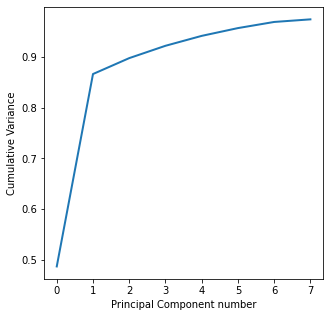

In [ ]:
# Θα τυπωσουμε το συσσωρευτικό ποσοστό διασποράς που εξηγείται από τις κύριες συνιστώσες
# Με λιγότερες από 5 κύριες συνιστώσες εξηγούμε 55% της διακύμανσης (πληροφορίας) του dataset, με 25 κοντά στο 70%.

evar = pca.explained_variance_ratio_
cum_evar = np.cumsum(evar)
print(cum_evar)
plt.figure(1, figsize=(5, 5))
plt.xlabel("Principal Component number")
plt.ylabel('Cumulative Variance')
plt.plot(cum_evar, linewidth=2)
plt.show()

In [ ]:
# Τέλος, ας εφαρμόσουμε την PCA στα δεδομένα και ας ξανα πάρουμε τα metrics:

print("kNN Classifier:\n")
gnb.fit(trainPCA, Y_train_resampled)   #The ".values.ravel()" returns a contiguous flattened array
predict = gnb.predict(testPCA)
print("Score on test PCA(5)")
print("accuracy_score")
print(accuracy_score(Y_test, predict))
print("classification_report")
print(classification_report(Y_test, predict))

kNN Classifier:

Score on test PCA(5)
accuracy_score
0.849818746763335
classification_report
              precision    recall  f1-score   support

           1       0.98      0.97      0.97       452
           2       0.91      0.99      0.95       224
           3       0.88      0.87      0.88       399
           4       0.50      0.54      0.52       196
           5       0.79      0.83      0.81       222
           7       0.85      0.78      0.81       438

    accuracy                           0.85      1931
   macro avg       0.82      0.83      0.82      1931
weighted avg       0.85      0.85      0.85      1931



### Παρατηρήσεις:
Βλέπουμε πως φέρνει εξίσου καλα αποτελέσματα με τον out of the box. Θα το χρησιμοποηήσουμε και στο pipeline για να εξερευνήσουμε ποιό " n " είναι κατάλληό για το δικό μας dataset. 

# Pipelining


## Pipeline, Εκτιμητές και Μετασχηματιστές

Μια διαδικασία ML ή workflow ή pipeline αποτελείται από μια σεiρα μετασχηματιστών πάνω στα χαρακτηριστικά των δεδομένων που τελειώνει σε έναν εκτιμητή (estomator). Οι μετασχηματιστές χρησιμοποιούνται για να κανουν την προεπεξεργασία (μέσω μετασχηματισμού) των δεδομένων. 

Οι μετασχηματιστές γενικα έχουν και αυτοί υπερ-παραμέτρους που επηρρεάζουν τη λειτουργία τους: ο VarianceThreshold είχε το κατώτερο κατώφλι διακύμανσης ο PCA τον αριθμό των κύριων συνιστωσών, ενώ ακόμα και οι scaler, min_max_scaler, RandomOverSampler και SMOTE έχουν αλλά δεν τις εξετάσαμε. Όπως έχουμε πει η επιλογή των υπερ-παραμέτρων (όπως το k του kNN) γίνεται μόνο εμπειρικά μέσω διασταυρούμενης επικύρωσης (cross-validation). Οι μετασχηματιστές και οι υπερπαράμετροι τους επιδρούν λοιπόν στη μορφή των δεδομένων.


#### Ορισμός (επιλογή) ενός εκπαιδευμένου μοντέλου εκτιμητή (ταξινομητή)

Μια ολοκληρωμένη διαδικασία pipeline λόγω του ότι τελειώνει σε έναν εκτιμητή μπορεί να θεωρηθεί και συνολικά ως ένας εκτιμητής, με κανένα, με λίγους ή με περισσότερους μετασχηματιστές πριν από τον εκτιμητή. Ένα εκπαιδευμένο μοντέλο εκτιμητή (ταξινομητή) αποτελείται
- α) απο την αρχιτεκτονική του, δηλαδή τον συνδυασμό μετασχηματιστών και την επιλογή του τελικού εκτιμητή (το pipeline), και 
- β) από τις (βέλτιστες) τιμές των υπερ-παραμέτρων όλων των προηγουμένων που προκύπτουν από το cross-validation. 

# Pipeline - Βελτιστοποίηση


In [ ]:
from sklearn.model_selection import train_test_split

#Split our data
X_train, X_test, y_train, y_test = train_test_split(np_pixels, classNum, test_size=0.3)

# Pipelining GNB - Accuracy & F1 macro

In [ ]:
# define all techniques to be used below
import time
import timeit
from sklearn.metrics import f1_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE 
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline

selector = VarianceThreshold()
stardarScaler = StandardScaler()
minmaxScaler = MinMaxScaler()
ros = RandomOverSampler()
smote = SMOTE()
pca = PCA()
# clf  Already defined --> gnb, knn, lr

# import warnings filter
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)


In [ ]:
# the attributes

threshold = [0, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35]
threshold_minmax = [0, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035]
n_components = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34]
n_components_minmax = [2,4,6,8,10,12,14,16,18,20]

### Accuracy 

In [ ]:
# threshold/StandarScaler/SandomeOverSampler/pca
#accuracy
GNB_pipe = Pipeline(steps=[('selector', selector), ('scaler', stardarScaler), ('sampler', ros), ('pca', pca), ('GNB', gnb)], memory = 'tmp')
GNB_acc_estimator = GridSearchCV(GNB_pipe, dict(selector__threshold=threshold, pca__n_components=n_components), cv=10, scoring='accuracy', n_jobs=-1)
start = timeit.default_timer()
GNB_acc_estimator.fit(X_train, y_train.values.ravel())
stop = timeit.default_timer()
print("StandarScaler & SandomeOverSampler\n")
print('The best accuracy score found : ',GNB_acc_estimator.best_score_)
print('The best parameters found :\n ', GNB_acc_estimator.best_params_)
print(GNB_acc_estimator.best_estimator_)
print('Time: ', stop - start)

print("F1 score macro on test set :  ", f1_score(y_test, GNB_acc_estimator.predict(X_test), average='macro') )
print('Accuracy score found is : ', accuracy_score(y_test, GNB_acc_estimator.predict(X_test)))  #print the score found for the test set


StandarScaler & SandomeOverSampler

The best accuracy score found :  0.8403720128110372
The best parameters found :
  {'pca__n_components': 6, 'selector__threshold': 0}
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('pca', PCA(n_components=6)), ('GNB', GaussianNB())])
Time:  11.481612462000157
F1 score macro on test set :   0.8165467195820032
Accuracy score found is :  0.845675815639565


In [ ]:
# threshold/StandarScaler/SMOTE/pca
#accuracy
GNB_pipe = Pipeline(steps=[('selector', selector), ('scaler', stardarScaler), ('sampler', smote), ('pca', pca), ('GNB', gnb)], memory = 'tmp')
GNB_acc_estimator = GridSearchCV(GNB_pipe, dict(selector__threshold=threshold, pca__n_components=n_components,), cv=10, scoring='accuracy', n_jobs=-1)
start = timeit.default_timer()
GNB_acc_estimator.fit(X_train, y_train.values.ravel())
stop = timeit.default_timer()
print("StandarScaler & SMOTE\n")
print('The best accuracy score found : ',GNB_acc_estimator.best_score_)
print('The best parameters found :\n ', GNB_acc_estimator.best_params_)
print(GNB_acc_estimator.best_estimator_)
print('Time: ', stop - start)

print("F1 score macro on test set :  ", f1_score(y_test, GNB_acc_estimator.predict(X_test), average='macro') )
print('Accuracy score found is : ', accuracy_score(y_test, GNB_acc_estimator.predict(X_test)))  #print the score found for the test set


StandarScaler & SMOTE

The best accuracy score found :  0.8459167282581916
The best parameters found :
  {'pca__n_components': 18, 'selector__threshold': 0}
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', StandardScaler()), ('sampler', SMOTE()),
                ('pca', PCA(n_components=18)), ('GNB', GaussianNB())])
Time:  11.668370850999963
F1 score macro on test set :   0.8244101117858981
Accuracy score found is :  0.8534438114966338


In [ ]:
# threshold/MinMaxScaler/SandomeOverSampler/pca
#accuracy
GNB_pipe = Pipeline(steps=[('selector', selector), ('scaler', minmaxScaler), ('sampler', ros), ('pca', pca), ('GNB', gnb)], memory = 'tmp')
GNB_acc_estimator = GridSearchCV(GNB_pipe, dict(selector__threshold=threshold_minmax, pca__n_components=n_components_minmax), cv=10, scoring='accuracy', n_jobs=-1)
start = timeit.default_timer()
GNB_acc_estimator.fit(X_train, y_train.values.ravel())
stop = timeit.default_timer()
print("MinMaxScaler & SandomeOverSampler\n")
print('The best accuracy score found : ',GNB_acc_estimator.best_score_)
print('The best parameters found :\n ', GNB_acc_estimator.best_params_)
print(GNB_acc_estimator.best_estimator_)
print('Time: ', stop - start)

print(" F1 score macro on test set :  ", f1_score(y_test, GNB_acc_estimator.predict(X_test), average='macro') )
print('Accuracy score found is : ', accuracy_score(y_test, GNB_acc_estimator.predict(X_test)))  #print the score found for the test set


MinMaxScaler & SandomeOverSampler

The best accuracy score found :  0.8405843803892583
The best parameters found :
  {'pca__n_components': 14, 'selector__threshold': 0}
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', MinMaxScaler()), ('sampler', RandomOverSampler()),
                ('pca', PCA(n_components=14)), ('GNB', GaussianNB())])
Time:  9.733622932999879
 F1 score macro on test set :   0.8164545084995706
Accuracy score found is :  0.8446400828586225


In [ ]:
# threshold/MinMaxScaler/SMOTE/pca
#accuracy
GNB_pipe = Pipeline(steps=[('selector', selector), ('scaler', minmaxScaler), ('sampler', smote), ('pca', pca), ('GNB', gnb)], memory = 'tmp')
GNB_acc_estimator = GridSearchCV(GNB_pipe, dict(selector__threshold=threshold_minmax, pca__n_components=n_components,), cv=10, scoring='accuracy', n_jobs=-1)
start = timeit.default_timer()
GNB_acc_estimator.fit(X_train, y_train.values.ravel())
stop = timeit.default_timer()
print("MinMaxScaler & SMOTE\n")
print('The best accuracy score found : ',GNB_acc_estimator.best_score_)
print('The best parameters found :\n ', GNB_acc_estimator.best_params_)
print(GNB_acc_estimator.best_estimator_)
print('Time: ', stop - start)

print(" F1 score macro on test set :  ", f1_score(y_test, GNB_acc_estimator.predict(X_test), average='macro') )
print('Accuracy score found is : ', accuracy_score(y_test, GNB_acc_estimator.predict(X_test)))  #print the score found for the test set


MinMaxScaler & SMOTE

The best accuracy score found :  0.848360187238236
The best parameters found :
  {'pca__n_components': 16, 'selector__threshold': 0}
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', MinMaxScaler()), ('sampler', SMOTE()),
                ('pca', PCA(n_components=16)), ('GNB', GaussianNB())])
Time:  11.776073831000076
 F1 score macro on test set :   0.8189285554567912
Accuracy score found is :  0.8487830139823925


### F1 macro

In [ ]:
# threshold/StandarScaler/SandomeOverSampler/pca
#f1 macro
GNB_pipe = Pipeline(steps=[('selector', selector), ('scaler', stardarScaler), ('sampler', ros), ('pca', pca), ('GNB', gnb)], memory = 'tmp')
GNB_macro_estimator = GridSearchCV(GNB_pipe, dict(selector__threshold=threshold, pca__n_components=n_components), cv=10, scoring='f1_macro', n_jobs=-1)
start = timeit.default_timer()
GNB_macro_estimator.fit(X_train, y_train.values.ravel())
stop = timeit.default_timer()
print("StandarScaler & SandomeOverSampler\n")
print('The best F1 score found : ',GNB_macro_estimator.best_score_)
print('The best parameters found :\n ', GNB_macro_estimator.best_params_)
print(GNB_macro_estimator.best_estimator_)
print('Time: ', stop - start)

print(" F1 score macro on test set :  ", f1_score(y_test, GNB_macro_estimator.predict(X_test), average='macro') )
print('Accuracy score found is : ', accuracy_score(y_test, GNB_macro_estimator.predict(X_test)))  #print the score found for the test set


StandarScaler & SandomeOverSampler

The best F1 score found :  0.8068269874872442
The best parameters found :
  {'pca__n_components': 6, 'selector__threshold': 0}
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('pca', PCA(n_components=6)), ('GNB', GaussianNB())])
Time:  26.02434145100051
 F1 score macro on test set :   0.821930378970147
Accuracy score found is :  0.8446400828586225


In [ ]:
# threshold/StandarScaler/SMOTE/pca
#f1 macro
GNB_pipe = Pipeline(steps=[('selector', selector), ('scaler', stardarScaler), ('sampler', smote), ('pca', pca), ('GNB', gnb)], memory = 'tmp')
GNB_macro_estimator = GridSearchCV(GNB_pipe, dict(selector__threshold=threshold, pca__n_components=n_components,), cv=10, scoring='f1_macro', n_jobs=-1)
start = timeit.default_timer()
GNB_macro_estimator.fit(X_train, y_train.values.ravel())
stop = timeit.default_timer()
print("StandarScaler & SMOTE\n")
print('The best F1 score found : ',GNB_macro_estimator.best_score_)
print('The best parameters found :\n ', GNB_macro_estimator.best_params_)
print(GNB_macro_estimator.best_estimator_)
print('Time: ', stop - start)

print(" F1 score macro on test set :  ", f1_score(y_test, GNB_macro_estimator.predict(X_test), average='macro') )
print('Accuracy score found is : ', accuracy_score(y_test, GNB_macro_estimator.predict(X_test)))  #print the score found for the test set


StandarScaler & SMOTE

The best F1 score found :  0.8184902528382457
The best parameters found :
  {'pca__n_components': 14, 'selector__threshold': 0}
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', StandardScaler()), ('sampler', SMOTE()),
                ('pca', PCA(n_components=14)), ('GNB', GaussianNB())])
Time:  29.572177949000434
 F1 score macro on test set :   0.8371633719862416
Accuracy score found is :  0.8601760745727602


In [ ]:
# threshold/MinMaxScaler/SandomeOverSampler/pca
#f1 macro
GNB_pipe = Pipeline(steps=[('selector', selector), ('scaler', minmaxScaler), ('sampler', ros), ('pca', pca), ('GNB', gnb)], memory = 'tmp')
GNB_macro_estimator = GridSearchCV(GNB_pipe, dict(selector__threshold=threshold_minmax, pca__n_components=n_components_minmax), cv=10, scoring='f1_macro', n_jobs=-1)
start = timeit.default_timer()
GNB_macro_estimator.fit(X_train, y_train.values.ravel())
stop = timeit.default_timer()
print("MinMaxScaler & SandomeOverSampler\n")
print('The best F1 score found : ',GNB_macro_estimator.best_score_)
print('The best parameters found :\n ', GNB_macro_estimator.best_params_)
print(GNB_macro_estimator.best_estimator_)
print('Time: ', stop - start)

print(" F1 score macro on test set :  ", f1_score(y_test, GNB_macro_estimator.predict(X_test), average='macro') )
print('Accuracy score found is : ', accuracy_score(y_test, GNB_macro_estimator.predict(X_test)))  #print the score found for the test set


MinMaxScaler & SandomeOverSampler

The best F1 score found :  0.8153863305557302
The best parameters found :
  {'pca__n_components': 8, 'selector__threshold': 0}
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', MinMaxScaler()), ('sampler', RandomOverSampler()),
                ('pca', PCA(n_components=8)), ('GNB', GaussianNB())])
Time:  18.05769789599981
 F1 score macro on test set :   0.825208299534467
Accuracy score found is :  0.84360435007768


In [ ]:
# threshold/MinMaxScaler/SMOTE/pca
#f1 macro
GNB_pipe = Pipeline(steps=[('selector', selector), ('scaler', minmaxScaler), ('sampler', smote), ('pca', pca), ('GNB', gnb)], memory = 'tmp')
GNB_macro_estimator = GridSearchCV(GNB_pipe, dict(selector__threshold=threshold_minmax, pca__n_components=n_components,), cv=10, scoring='f1_macro', n_jobs=-1)
start = timeit.default_timer()
GNB_macro_estimator.fit(X_train, y_train.values.ravel())
stop = timeit.default_timer()
print("MinMaxScaler & SMOTE\n")
print('The best F1 score found : ',GNB_macro_estimator.best_score_)
print('The best parameters found :\n ', GNB_macro_estimator.best_params_)
print(GNB_macro_estimator.best_estimator_)
print('Time: ', stop - start)

print(" F1 score macro on test set :  ", f1_score(y_test, GNB_macro_estimator.predict(X_test), average='macro') )
print('Accuracy score found is : ', accuracy_score(y_test, GNB_macro_estimator.predict(X_test)))  #print the score found for the test set


MinMaxScaler & SMOTE

The best F1 score found :  0.8199964071680255
The best parameters found :
  {'pca__n_components': 24, 'selector__threshold': 0}
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', MinMaxScaler()), ('sampler', SMOTE()),
                ('pca', PCA(n_components=24)), ('GNB', GaussianNB())])
Time:  30.684168671000407
 F1 score macro on test set :   0.8361420532060772
Accuracy score found is :  0.8570688762299327


# Pipelining kNN - Accuracy & F1 macro

In [ ]:
# define all techniques to be used below
import time
import timeit
from sklearn.metrics import f1_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE 
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline

selector = VarianceThreshold()
stardarScaler = StandardScaler()
minmaxScaler = MinMaxScaler()
ros = RandomOverSampler()
smote = SMOTE()
pca = PCA()
# clf  Already defined --> gnb, knn, lr

# import warnings filter
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

threshold = [0, 0.1, 0.2, 0.25, 0.3] #, 0.35]
threshold_minmax = [0, 0.01, 0.02, 0.025, 0.03] #, 0.035]
n_components = [2,4,6,8,10,12,14,16,18,20,22,24]#,26,28,30,32,34,36]
n_neighbors = [1,5,10,15,20,25] #,30,35]

### Accuracy

In [ ]:
#threshold/StandarScaler/SandomeOverSampler/pca
#accuracy
kNN_pipe = Pipeline(steps=[('selector', selector), ('scaler', stardarScaler), ('sampler', ros), ('pca', pca), ('knn', knn)], memory = 'tmp')
kNN_acc_estimator = GridSearchCV(kNN_pipe, dict(selector__threshold=threshold, pca__n_components=n_components,knn__n_neighbors=n_neighbors), cv=10, scoring='accuracy', n_jobs=-1)
start = timeit.default_timer()
kNN_acc_estimator.fit(X_train, y_train.values.ravel())
stop = timeit.default_timer()

print("StandarScaler & SandomeOverSampler\n")
print('The best accuracy score found : ', kNN_acc_estimator.best_score_)
print('The best parameters found are :\n ', kNN_acc_estimator.best_params_)
print(kNN_acc_estimator.best_estimator_)
print('Time: ', stop - start)

print("F1 score macro on test set :  ", f1_score(y_test, kNN_acc_estimator.predict(X_test), average='macro') )
print('Accuracy score found is : ', accuracy_score(y_test, kNN_acc_estimator.predict(X_test)))  #print the score found for the test set

StandarScaler & SandomeOverSampler

The best accuracy score found :  0.9049721606306973
The best parameters found are :
  {'knn__n_neighbors': 1, 'pca__n_components': 14, 'selector__threshold': 0}
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('pca', PCA(n_components=14)),
                ('knn', KNeighborsClassifier(n_neighbors=1))])
Time:  166.96069697899998
F1 score macro on test set :   0.8994314893489602
Accuracy score found is :  0.9135163127912999


In [ ]:
# threshold/MinMaxScaler/SandomeOverSampler/pca
#accuracy
kNN_pipe = Pipeline(steps=[('scaler', minmaxScaler), ('selector', selector), ('sampler', ros), ('pca', pca), ('knn', knn)], memory = 'tmp')
kNN_acc_best_estimator = GridSearchCV(kNN_pipe, dict(selector__threshold=threshold_minmax, pca__n_components=n_components,knn__n_neighbors=n_neighbors), cv=10, scoring='accuracy', n_jobs=-1)
start = timeit.default_timer()
kNN_acc_best_estimator.fit(X_train, y_train.values.ravel())
stop = timeit.default_timer()

print("MinMaxScaler & SandomeOverSampler\n")
print('The best accuracy score found : ', kNN_acc_best_estimator.best_score_)
print('The best parameters found are :\n ', kNN_acc_best_estimator.best_params_)
print(kNN_acc_best_estimator.best_estimator_)
print('Time: ', stop - start)

print("F1 score macro on test set :  ", f1_score(y_test, kNN_acc_best_estimator.predict(X_test), average='macro') )
print('Accuracy score found is : ', accuracy_score(y_test, kNN_acc_best_estimator.predict(X_test)))  #print the score found for the test set

MinMaxScaler & SandomeOverSampler

The best accuracy score found :  0.9023069721606307
The best parameters found are :
  {'knn__n_neighbors': 1, 'pca__n_components': 16, 'selector__threshold': 0}
Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler()),
                ('selector', VarianceThreshold(threshold=0)),
                ('sampler', RandomOverSampler()), ('pca', PCA(n_components=16)),
                ('knn', KNeighborsClassifier(n_neighbors=1))])
Time:  174.71654555200007
F1 score macro on test set :   0.8911884304871736
Accuracy score found is :  0.9062661833247022


In [ ]:
# threshold/StandarScaler/SMOTE/pca
#accuracy
kNN_pipe = Pipeline(steps=[('scaler', stardarScaler), ('selector', selector), ('sampler', smote), ('pca', pca), ('knn', knn)], memory = 'tmp')
kNN_acc_estimator = GridSearchCV(kNN_pipe, dict(selector__threshold=threshold, pca__n_components=n_components,knn__n_neighbors=n_neighbors), cv=10, scoring='accuracy', n_jobs=-1)
start = timeit.default_timer()
kNN_acc_estimator.fit(X_train, y_train.values.ravel())
stop = timeit.default_timer()

print("StandarScaler & SMOTE\n")
print('The best accuracy score found : ', kNN_acc_estimator.best_score_)
print('The best parameters found are :\n ', kNN_acc_estimator.best_params_)
print(kNN_acc_estimator.best_estimator_)
print('Time: ', stop - start)

print("F1 score macro on test set :  ", f1_score(y_test, kNN_acc_estimator.predict(X_test), average='macro') )
print('Accuracy score found is : ', accuracy_score(y_test, kNN_acc_estimator.predict(X_test)))  #print the score found for the test set

StandarScaler & SMOTE

The best accuracy score found :  0.9056388272973639
The best parameters found are :
  {'knn__n_neighbors': 1, 'pca__n_components': 12, 'selector__threshold': 0}
Pipeline(memory='tmp',
         steps=[('scaler', StandardScaler()),
                ('selector', VarianceThreshold(threshold=0)),
                ('sampler', SMOTE()), ('pca', PCA(n_components=12)),
                ('knn', KNeighborsClassifier(n_neighbors=1))])
Time:  174.9026563980001
F1 score macro on test set :   0.8943103533026759
Accuracy score found is :  0.9088555152770585


In [ ]:
# threshold/MinMaxScaler/SMOTE/pca
#accuracy
kNN_pipe = Pipeline(steps=[('scaler', minmaxScaler), ('selector', selector), ('sampler', smote), ('pca', pca), ('knn', knn)], memory = 'tmp')
kNN_acc_estimator = GridSearchCV(kNN_pipe, dict(selector__threshold=threshold_minmax, pca__n_components=n_components,knn__n_neighbors=n_neighbors), cv=10, scoring='accuracy', n_jobs=-1)
start = timeit.default_timer()
kNN_acc_estimator.fit(X_train, y_train.values.ravel())
stop = timeit.default_timer()

print("MinMaxScaler & SMOTE\n")
print('The best accuracy score found : ', kNN_acc_estimator.best_score_)
print('The best parameters found are :\n ', kNN_acc_estimator.best_params_)
print(kNN_acc_estimator.best_estimator_)
print('Time: ', stop - start)

print("F1 score macro on test set :  ", f1_score(y_test, kNN_acc_estimator.predict(X_test), average='macro') )
print('Accuracy score found is : ', accuracy_score(y_test, kNN_acc_estimator.predict(X_test)))  #print the score found for the test set

MinMaxScaler & SMOTE

The best accuracy score found :  0.8967607785168761
The best parameters found are :
  {'knn__n_neighbors': 1, 'pca__n_components': 12, 'selector__threshold': 0}
Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler()),
                ('selector', VarianceThreshold(threshold=0)),
                ('sampler', SMOTE()), ('pca', PCA(n_components=12)),
                ('knn', KNeighborsClassifier(n_neighbors=1))])
Time:  180.42201234200002
F1 score macro on test set :   0.8975826647877853
Accuracy score found is :  0.9083376488865873


### F1 macro

In [ ]:
# threshold/StandarScaler/SandomeOverSampler/pca
#f1 macro
kNN_pipe = Pipeline(steps=[('selector', selector), ('scaler', stardarScaler), ('sampler', ros), ('pca', pca), ('knn', knn)], memory = 'tmp')
kNN_macro_estimator = GridSearchCV(kNN_pipe, dict(selector__threshold=threshold, pca__n_components=n_components,knn__n_neighbors=n_neighbors), cv=10, scoring='f1_macro', n_jobs=-1)
start = timeit.default_timer()
kNN_macro_estimator.fit(X_train, y_train.values.ravel())
stop = timeit.default_timer()

print("StandarScaler & SandomeOverSampler\n")
print('The best F1 score found : ', kNN_macro_estimator.best_score_)
print('The best parameters found are :\n ', kNN_macro_estimator.best_params_)
print(kNN_macro_estimator.best_estimator_)
print('Time: ', stop - start)

print("F1 score macro on test set :  ", f1_score(y_test, kNN_macro_estimator.predict(X_test), average='macro') )
print('Accuracy score found is : ', accuracy_score(y_test, kNN_macro_estimator.predict(X_test)))  #print the score found for the test set

StandarScaler & SandomeOverSampler

The best F1 score found :  0.8873351861529575
The best parameters found are :
  {'knn__n_neighbors': 1, 'pca__n_components': 14, 'selector__threshold': 0}
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('pca', PCA(n_components=14)),
                ('knn', KNeighborsClassifier(n_neighbors=1))])
Time:  179.6566561929999
F1 score macro on test set :   0.8882239628348924
Accuracy score found is :  0.9073019161056447


In [ ]:
# threshold/MinMaxScaler/SandomeOverSampler/pca
#f1 macro
kNN_pipe = Pipeline(steps=[('scaler', minmaxScaler), ('selector', selector), ('sampler', ros), ('pca', pca), ('knn', knn)], memory = 'tmp')
kNN_macro_best_estimator = GridSearchCV(kNN_pipe, dict(selector__threshold=threshold_minmax, pca__n_components=n_components,knn__n_neighbors=n_neighbors), cv=10, scoring='f1_macro', n_jobs=-1)
start = timeit.default_timer()
kNN_macro_best_estimator.fit(X_train, y_train.values.ravel())
stop = timeit.default_timer()

print("MinMaxScaler & SandomeOverSampler\n")
print('The best F1 score found : ', kNN_macro_best_estimator.best_score_)
print('The best parameters found are :\n ', kNN_macro_best_estimator.best_params_)
print(kNN_macro_best_estimator.best_estimator_)
print('Time: ', stop - start)

print("F1 score macro on test set :  ", f1_score(y_test, kNN_macro_best_estimator.predict(X_test), average='macro') )
print('Accuracy score found is : ', accuracy_score(y_test, kNN_macro_best_estimator.predict(X_test)))  #print the score found for the test set

MinMaxScaler & SandomeOverSampler

The best F1 score found :  0.8836446734306753
The best parameters found are :
  {'knn__n_neighbors': 1, 'pca__n_components': 12, 'selector__threshold': 0}
Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler()),
                ('selector', VarianceThreshold(threshold=0)),
                ('sampler', RandomOverSampler()), ('pca', PCA(n_components=12)),
                ('knn', KNeighborsClassifier(n_neighbors=1))])
Time:  174.0465128830001
F1 score macro on test set :   0.8832981408158691
Accuracy score found is :  0.9036768513723459


In [ ]:
# threshold/StandarScaler/SMOTE/pca
#f1 macro
kNN_pipe = Pipeline(steps=[('scaler', stardarScaler), ('selector', selector), ('sampler', smote), ('pca', pca), ('knn', knn)], memory = 'tmp')
kNN_macro_estimator = GridSearchCV(kNN_pipe, dict(selector__threshold=threshold, pca__n_components=n_components,knn__n_neighbors=n_neighbors), cv=10, scoring='f1_macro', n_jobs=-1)
start = timeit.default_timer()
kNN_macro_estimator.fit(X_train, y_train.values.ravel())
stop = timeit.default_timer()

print("StandarScaler & SMOTE\n")
print('The best F1 score found : ', kNN_macro_estimator.best_score_)
print('The best parameters found are :\n ', kNN_macro_estimator.best_params_)
print(kNN_macro_estimator.best_estimator_)
print('Time: ', stop - start)

print("F1 score macro on test set :  ", f1_score(y_test, kNN_macro_estimator.predict(X_test), average='macro') )
print('Accuracy score found is : ', accuracy_score(y_test, kNN_macro_estimator.predict(X_test)))  #print the score found for the test set

StandarScaler & SMOTE

The best F1 score found :  0.8927140367867838
The best parameters found are :
  {'knn__n_neighbors': 1, 'pca__n_components': 12, 'selector__threshold': 0}
Pipeline(memory='tmp',
         steps=[('scaler', StandardScaler()),
                ('selector', VarianceThreshold(threshold=0)),
                ('sampler', SMOTE()), ('pca', PCA(n_components=12)),
                ('knn', KNeighborsClassifier(n_neighbors=1))])
Time:  198.95822014699934
F1 score macro on test set :   0.8914170108545267
Accuracy score found is :  0.9026411185914034


In [ ]:
# threshold/MinMaxScaler/SMOTE/pca
#f1 macro
kNN_pipe = Pipeline(steps=[('scaler', minmaxScaler), ('selector', selector), ('sampler', smote), ('pca', pca), ('knn', knn)], memory = 'tmp')
kNN_macro_estimator = GridSearchCV(kNN_pipe, dict(selector__threshold=threshold_minmax, pca__n_components=n_components,knn__n_neighbors=n_neighbors), cv=10, scoring='f1_macro', n_jobs=-1)
start = timeit.default_timer()
kNN_macro_estimator.fit(X_train, y_train.values.ravel())
stop = timeit.default_timer()

print("MinMaxScaler & SMOTE\n")
print('The best F1 score found : ', kNN_macro_estimator.best_score_)
print('The best parameters found are :\n ', kNN_macro_estimator.best_params_)
print(kNN_macro_estimator.best_estimator_)
print('Time: ', stop - start)

print("F1 score macro on test set :  ", f1_score(y_test, kNN_macro_estimator.predict(X_test), average='macro') )
print('Accuracy score found is : ', accuracy_score(y_test, kNN_macro_estimator.predict(X_test)))  #print the score found for the test set

MinMaxScaler & SMOTE

The best F1 score found :  0.8861906645555123
The best parameters found are :
  {'knn__n_neighbors': 1, 'pca__n_components': 12, 'selector__threshold': 0}
Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler()),
                ('selector', VarianceThreshold(threshold=0)),
                ('sampler', SMOTE()), ('pca', PCA(n_components=12)),
                ('knn', KNeighborsClassifier(n_neighbors=1))])
Time:  199.22638261300017
F1 score macro on test set :   0.8923775456194617
Accuracy score found is :  0.9036768513723459


# Pipelining Logistic Regression - Accuracy & F1 macro

In [ ]:
# define all techniques to be used below
import time
import timeit
from sklearn.metrics import f1_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE 
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline

selector = VarianceThreshold()
stardarScaler = StandardScaler()
minmaxScaler = MinMaxScaler()
ros = RandomOverSampler()
smote = SMOTE()
pca = PCA()
# clf  Already defined --> gnb, knn, lr

# import warnings filter
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

threshold = [0, 0.1, 0.15, 0.2, 0.25, 0.3] #, 0.35]
threshold_minmax = [0, 0.1, 0.15, 0.2, 0.25] #, 0.3, 0.35]
n_components = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34]#,36]
n_components_minmax = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34]#,36]

In [ ]:
import warnings 
warnings.filterwarnings('ignore') 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='saga', max_iter=500)

from warnings import simplefilter

# ignore all warnings
simplefilter(action='ignore')

### Accuracy

In [ ]:
# threshold/StandarScaler/SandomeOverSampler/pca
#accuracy
LR_pipe = Pipeline(steps=[('selector', selector), ('scaler', stardarScaler), ('sampler', ros), ('pca', pca), ('logisic regression', lr)], memory = 'tmp')
LR_acc_estimator = GridSearchCV(LR_pipe, dict(selector__threshold=threshold, pca__n_components=n_components), cv=10, scoring='accuracy', n_jobs=-1)
start = timeit.default_timer()
LR_acc_estimator.fit(X_train, y_train.values.ravel())
stop = timeit.default_timer()

print("StandarScaler & SandomeOverSampler\n")
print('The best accuracy score found : ', LR_acc_estimator.best_score_)
print('The best parameters found are :\n ', LR_acc_estimator.best_params_)
print(LR_acc_estimator.best_estimator_)
print('Time: ', stop - start)

print("F1 score macro on test set :  ", f1_score(y_test, LR_acc_estimator.predict(X_test), average='macro') )
print('Accuracy score found is : ', accuracy_score(y_test,  LR_acc_estimator.predict(X_test)))  #print the score found for the test set

StandarScaler & SandomeOverSampler

The best accuracy score found :  0.8523606799704361
The best parameters found are :
  {'pca__n_components': 16, 'selector__threshold': 0}
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('pca', PCA(n_components=16)),
                ('logisic regression',
                 LogisticRegression(max_iter=500, solver='saga'))])
Time:  1101.5429831829997
F1 score macro on test set :   0.8382281788011586
Accuracy score found is :  0.8606939409632315


In [ ]:
# threshold/MinMaxScaler/SandomeOverSampler/pca
#accuracy
LR_pipe = Pipeline(steps=[('selector', selector), ('scaler', minmaxScaler), ('sampler', ros), ('pca', pca), ('logisic regression', lr)], memory = 'tmp')
LR_acc_estimator = GridSearchCV(LR_pipe, dict(selector__threshold=threshold_minmax, pca__n_components=n_components_minmax), cv=10, scoring='accuracy', n_jobs=-1)
start = timeit.default_timer()
LR_acc_estimator.fit(X_train, y_train.values.ravel())
stop = timeit.default_timer()

print("MinMaxScaler & SandomeOverSampler \n")
print('The best accuracy score found : ', LR_acc_estimator.best_score_)
print('The best parameters found are :\n ', LR_acc_estimator.best_params_)
print(LR_acc_estimator.best_estimator_)
print('Time: ', stop - start)

print("F1 score macro on test set :  ", f1_score(y_test, LR_acc_estimator.predict(X_test), average='macro') )
print('Accuracy score found is : ', accuracy_score(y_test,  LR_acc_estimator.predict(X_test)))  #print the score found for the test set

MinMaxScaler & SandomeOverSampler 

The best accuracy score found :  0.8439221483123923
The best parameters found are :
  {'pca__n_components': 18, 'selector__threshold': 0}
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', MinMaxScaler()), ('sampler', RandomOverSampler()),
                ('pca', PCA(n_components=18)),
                ('logisic regression', LogisticRegression(solver='saga'))])
Time:  141.85077006600022
F1 score macro on test set :   0.8265666751667157
Accuracy score found is :  0.8513723459347489


In [ ]:
# threshold/StandarScaler/SMOTE/pca
#accuracy
LR_pipe = Pipeline(steps=[('selector', selector), ('scaler', stardarScaler), ('sampler', smote), ('pca', pca), ('logisic regression', lr)], memory = 'tmp')
LR_acc_estimator = GridSearchCV(LR_pipe, dict(selector__threshold=threshold, pca__n_components=n_components), cv=10, scoring='accuracy', n_jobs=-1)
start = timeit.default_timer()
LR_acc_estimator.fit(X_train, y_train.values.ravel())
stop = timeit.default_timer()

print("StandarScaler & SMOTE \n")
print('The best accuracy score found : ', LR_acc_estimator.best_score_)
print('The best parameters found are :\n ', LR_acc_estimator.best_params_)
print(LR_acc_estimator.best_estimator_)
print('Time: ', stop - start)

print("F1 score macro on test set :  ", f1_score(y_test, LR_acc_estimator.predict(X_test), average='macro') )
print('Accuracy score found is : ', accuracy_score(y_test,  LR_acc_estimator.predict(X_test)))  #print the score found for the test set

MinMaxScaler & SandomeOverSampler 

The best accuracy score found :  0.8439221483123923
The best parameters found are :
  {'pca__n_components': 18, 'selector__threshold': 0}
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', MinMaxScaler()), ('sampler', RandomOverSampler()),
                ('pca', PCA(n_components=18)),
                ('logisic regression',
                 LogisticRegression(max_iter=500, solver='saga'))])
Time:  140.90164498800004
F1 score macro on test set :   0.8265666751667157
Accuracy score found is :  0.8513723459347489


In [ ]:
# threshold/MinMaxScaler/SMOTE/pca
#accuracy
LR_pipe = Pipeline(steps=[('selector', selector), ('scaler', minmaxScaler), ('sampler', smote), ('pca', pca), ('logisic regression', lr)], memory = 'tmp')
LR_acc_estimator = GridSearchCV(LR_pipe, dict(selector__threshold=threshold_minmax, pca__n_components=n_components_minmax), cv=10, scoring='accuracy', n_jobs=-1)
start = timeit.default_timer()
LR_acc_estimator.fit(X_train, y_train.values.ravel())
stop = timeit.default_timer()

print("MinMaxScaler & SMOTE \n")
print('The best accuracy score found : ', LR_acc_estimator.best_score_)
print('The best parameters found are :\n ', LR_acc_estimator.best_params_)
print(LR_acc_estimator.best_estimator_)
print('Time: ', stop - start)

print("F1 score macro on test set :  ", f1_score(y_test, LR_acc_estimator.predict(X_test), average='macro') )
print('Accuracy score found is : ', accuracy_score(y_test,  LR_acc_estimator.predict(X_test)))  #print the score found for the test set


MinMaxScaler & SMOTE 

The best accuracy score found :  0.8459206701157921
The best parameters found are :
  {'pca__n_components': 26, 'selector__threshold': 0}
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', MinMaxScaler()), ('sampler', SMOTE()),
                ('pca', PCA(n_components=26)),
                ('logisic regression',
                 LogisticRegression(max_iter=500, solver='saga'))])
Time:  141.65793614599988
F1 score macro on test set :   0.8281256537547174
Accuracy score found is :  0.8518902123252201


### F1 macro

In [ ]:
# threshold/StandarScaler/SandomeOverSampler/pca
#f1 macro
LR_pipe = Pipeline(steps=[('selector', selector), ('scaler', stardarScaler), ('sampler', ros), ('pca', pca), ('logisic regression', lr)], memory = 'tmp')
LR_macro_estimator = GridSearchCV(LR_pipe, dict(selector__threshold=threshold, pca__n_components=n_components), cv=10, scoring='f1_macro', n_jobs=-1)
start = timeit.default_timer()
LR_macro_estimator.fit(X_train, y_train.values.ravel())
stop = timeit.default_timer()

print("StandarScaler & SandomeOverSampler\n")
print('The best F1 score found : ', LR_macro_estimator.best_score_)
print('The best parameters found are :\n ', LR_macro_estimator.best_params_)
print(LR_macro_estimator.best_estimator_)
print('Time: ', stop - start)

print("F1 score macro on test set :  ", f1_score(y_test, LR_macro_estimator.predict(X_test), average='macro') )
print('Accuracy score found is : ', accuracy_score(y_test,  LR_macro_estimator.predict(X_test)))  #print the score found for the test set

StandarScaler & SandomeOverSampler

The best F1 score found :  0.8346302734083393
The best parameters found are :
  {'pca__n_components': 24, 'selector__threshold': 0}
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('pca', PCA(n_components=24)),
                ('logisic regression',
                 LogisticRegression(max_iter=500, solver='saga'))])
Time:  1166.823351135
F1 score macro on test set :   0.8388844817044235
Accuracy score found is :  0.8539616778871051


In [ ]:
# threshold/StandarScaler/SMOTE/pca
#f1 macro
LR_pipe = Pipeline(steps=[('selector', selector), ('scaler', stardarScaler), ('sampler', smote), ('pca', pca), ('logisic regression', lr)], memory = 'tmp')
LR_macro_estimator = GridSearchCV(LR_pipe, dict(selector__threshold=threshold, pca__n_components=n_components), cv=10, scoring='f1_macro', n_jobs=-1)
start = timeit.default_timer()
LR_macro_estimator.fit(X_train, y_train.values.ravel())
stop = timeit.default_timer()

print("StandarScaler & SMOTE \n")
print('The best F1 score found : ', LR_macro_estimator.best_score_)
print('The best parameters found are :\n ', LR_macro_estimator.best_params_)
print(LR_macro_estimator.best_estimator_)
print('Time: ', stop - start)

print("F1 score macro on test set :  ", f1_score(y_test, LR_macro_estimator.predict(X_test), average='macro') )
print('Accuracy score found is : ', accuracy_score(y_test,  LR_macro_estimator.predict(X_test)))  #print the score found for the test set

StandarScaler & SMOTE 

The best F1 score found :  0.8376994446603285
The best parameters found are :
  {'pca__n_components': 18, 'selector__threshold': 0}
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', StandardScaler()), ('sampler', SMOTE()),
                ('pca', PCA(n_components=18)),
                ('logisic regression',
                 LogisticRegression(max_iter=500, solver='saga'))])
Time:  1202.5297474729996
F1 score macro on test set :   0.8416377084025001
Accuracy score found is :  0.8565510098394614


In [ ]:
# threshold/MinMaxScaler/SandomeOverSampler/pca
#f1 macro
LR_pipe = Pipeline(steps=[('selector', selector), ('scaler', minmaxScaler), ('sampler', ros), ('pca', pca), ('logisic regression', lr)], memory = 'tmp')
LR_macro_estimator = GridSearchCV(LR_pipe, dict(selector__threshold=threshold_minmax, pca__n_components=n_components_minmax), cv=10, scoring='f1_macro', n_jobs=-1)
start = timeit.default_timer()
LR_macro_estimator.fit(X_train, y_train.values.ravel())
stop = timeit.default_timer()

print("MinMaxScaler & SandomeOverSampler \n")
print('The best F1 score found : ', LR_macro_estimator.best_score_)
print('The best parameters found are :\n ', LR_macro_estimator.best_params_)
print(LR_macro_estimator.best_estimator_)
print('Time: ', stop - start)

print("F1 score macro on test set :  ", f1_score(y_test, LR_macro_estimator.predict(X_test), average='macro') )
print('Accuracy score found is : ', accuracy_score(y_test,  LR_macro_estimator.predict(X_test)))  #print the score found for the test set

MinMaxScaler & SandomeOverSampler 

The best F1 score found :  0.8236612446126627
The best parameters found are :
  {'pca__n_components': 16, 'selector__threshold': 0}
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', MinMaxScaler()), ('sampler', RandomOverSampler()),
                ('pca', PCA(n_components=16)),
                ('logisic regression',
                 LogisticRegression(max_iter=500, solver='saga'))])
Time:  144.16091132399924
F1 score macro on test set :   0.8353806827577275
Accuracy score found is :  0.8518902123252201


In [ ]:
# threshold/MinMaxScaler/SMOTE/pca
#f1 macro
LR_pipe = Pipeline(steps=[('selector', selector), ('scaler', minmaxScaler), ('sampler', smote), ('pca', pca), ('logisic regression', lr)], memory = 'tmp')
LR_macro_estimator = GridSearchCV(LR_pipe, dict(selector__threshold=threshold_minmax, pca__n_components=n_components_minmax), cv=10, scoring='f1_macro', n_jobs=-1)
start = timeit.default_timer()
LR_macro_estimator.fit(X_train, y_train.values.ravel())
stop = timeit.default_timer()

print("MinMaxScaler & SMOTE \n")
print('The best F1 score found : ', LR_macro_estimator.best_score_)
print('The best parameters found are :\n ', LR_macro_estimator.best_params_)
print(LR_macro_estimator.best_estimator_)
print('Time: ', stop - start)

print("F1 score macro on test set :  ", f1_score(y_test, LR_macro_estimator.predict(X_test), average='macro') )
print('Accuracy score found is : ', accuracy_score(y_test,  LR_macro_estimator.predict(X_test)))  #print the score found for the test set


MinMaxScaler & SMOTE 

The best F1 score found :  0.8259220909911079
The best parameters found are :
  {'pca__n_components': 28, 'selector__threshold': 0.1}
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.1)),
                ('scaler', MinMaxScaler()), ('sampler', SMOTE()),
                ('pca', PCA(n_components=28)),
                ('logisic regression',
                 LogisticRegression(max_iter=500, solver='saga'))])
Time:  145.20943252799952
F1 score macro on test set :   0.834344291938499
Accuracy score found is :  0.8513723459347489


In [ ]:
lr.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

#Αποτελέσματα
Παρακάτω, θα παρουσιάσουμε το ιστορικό της βελτίωσης των ταξινομητών, όσον αφορά την μετρική f1 macro και την μετρική accuracy. Θα παρουσιάσουμε μαζί τα αποτελέσματα για τις δύο μετρικές διαφοροποιόντας τις παραμέτρους τις οποίες βρήκαμε ως βέλτιστες στην εκάστοτε μετρική. Παρατηρήσαμε πως οι τιμές στο predict ήταν οι ίδιες σε όλους ταξινομητές μεταξύ f1 και accuracy και έτσι θα παρουσιάσουμε μια τιμή και για τα δύο <br>

### History Table for GNB


$$$$
Για τον gaussian naive bayes αποφασίσαμε να χρησιμοποιήσουμε και τον Standard Scaler και τον MinMax Scaler σε διαφορετικά Pipes καθώς και οι δύο ήταν πολύ κοντα σε τιμές. Το ίδιο κάναμε με το ROS και το SMOTE τα οποία χρησιμοποιήθηκαν και αυτά σε διαφορετικά pipes. Επίσης χρησιμοποιήθηκε η Variance Threshold.  Όπότε το pipe με βελτιώση ως προς macro ήταν στην παρακάτω δομή.

> $$ Pipe : variance\ threshold -> Standard/Minmax scaler ->ROS/Smote -> pca -> GaussianNB $$
>$$$$

Χρησιμοποιήσαμε τις παρακάτω τιμες για τις παραμέτρους:

**Τhreshold = [0, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35]** 

**Τhreshold_minmax = [0, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035]**  

**n_components = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34]**  

**n_components_minmax = [2,4,6,8,10,12,14,16,18,20]**


Παρατηρούμε ότι δεν μπορούμε να αυξήσουμε άλλο την απόδοση του classifier και επομένως σταματάμε στις τιμές:
$$$$
$$macro:\ pca\ components = 24\ , variance\ threshold = 0\ και\ με\
 χρήση\ MinMaxScaler\ , \ Smote\ ,δίνοντας\ στο\ train :$$

 $$f1\ macro\ score = 0.815\ ,   με\ χρόνο\ 30.68s$$ 

\

$$accuracy:\ pca\ components = 16\ , variance\ threshold = 0\ και\ με\  MinMaxScaler\ , \ Smote\ ,δίνοντας\ στο\ train :$$

$$*accuracy\  score = 0.848\,   με\ χρόνο\ 11.77s$$

Η μετρική accuracy πιάνει υψηλότερο score(best optimized:accuracy) γιατί θεωρούμε πως επειδή η μετρική accuracy είναι καλύτερη σε balanced και απλά προβλήματα σε αυτήν την περίπτωση είναι πιο αποτελεσματική.

Eκτελώντας την predict μέθοδο στο test set πλέον παίρνουμε ότι η απόδοση μας στο test set για micro optimization και accuracy ,αντίστοιχα, για τον GaussianNB είναι:

$$macro\ optimized:$$
$$f1\ score = 0.825$$       $$accuracy\ score = 0.843$$


$$accuracy\ optimized:$$
$$f1\ score = 0.818$$       $$accuracy\ score = 0.848$$

Παρατηρούμε ότι πήραμε αρκετά μεγαλύτερο score απο αυτό που βρήκαμε στο training set. Αυτό συμβαίνει διότι το dataset μας είναι πολύ μικρό με αποτέλεσμα το test set να περιεχεί λίγα δείγματα προς εξέταση και κατά συνέπεια ο παράγοντας τύχη να παίζει αρκετά σημαντικό ρόλο. Είναι αρκετά πιθανό πως αν προσπαθούσαμε να ξανα τρέξουμε τα ίδια cells θα παίρναμε διαφορετικά αποτελέσματα. Επίσης ο χωρισμός σε train και test παίζει σημαντίκο ρόλο όταν το dataset μας είναι τόσο μικρό με την έννοια ότι μπορεί να παίρναμε τελείως διαφορετικά αποτελέσμα αν χωρίζαμε απο την αρχή αλλίως το dataset.

##History Table for knn

Στον knn,λοιπόν, όπως και στον GNB αποφασίσαμε να χρησιμοποιήσουμε και τον Standard Scaler και τον MinMax Scaler σε διαφορετικά Pipes καθώς και οι δύο ήταν πολύ κοντα σε τιμές. Το ίδιο κάναμε με το ROS και το SMOTE τα οποία χρησιμοποιήθηκαν και αυτά σε διαφορετικά pipes. Επίσης χρησιμοποιήθηκε η Variance Threshold.  Όπότε το pipe με βελτιώση ως προς macro ήταν στην παρακάτω δομή.

> $$ Pipe (macro) : variance\ threshold -> Standard/Minmax scaler ->ROS/Smote -> pca -> GaussianNB $$
>$$$$


Χρησιμοποιήσαμε τις παρακάτω τιμες για τις παραμέτρους:


**threshold = [0, 0.1, 0.2, 0.25, 0.3]**

**threshold_minmax = [0, 0.01, 0.02, 0.025, 0.03]**

**n_components = [2,4,6,8,10,12,14,16,18,20,22,24]**

**n_neighbors = [1,5,10,15,20,25]**

Εφόσον υπολογίσαμε όλα τα παραπάνω βρήκαμε πως τνη καλύτερη τιμη score την εντοπίζουμε για τιμές:
$$$$
$$macro:\ pca\ components = 20\ , n\ neighboors\ = 1\ , variance\ threshold = 0\ και\ με\ χρήση\ StandardScaler\ , \ ROS\ ,δίνοντας\ στο\ train :$$


$$f1\ macro\ score = 0.889\ ,   με\ χρόνο\ 168.29s$$ 

\

$$accuracy:\ pca\ components = 14\ , n\ neighboors\ = 1\ , variance\ threshold = 0\ και\ με\ χρήση\ StandardScaler\ , \ ROS\ ,δίνοντας\ στο\ train :$$
$$accuracy\  score = 0.904\,   με\ χρόνο\ 166s$$

Eκτελώντας την predict μέθοδο στο test set πλέον παίρνουμε ότι η απόδοση μας στο test set για micro optimization και accuracy ,αντίστιοιχα, του Knn είναι:

$$macro\ optimized:$$
$$f1\ score = 0.896$$       $$accuracy\ score = 0.91$$

\


$$accuracy\ optimized:$$
$$f1\ score = 0.899$$       $$accuracy\ score = 0.913$$

Εδώ ισχύουν ίδιες παρατηρήσεις όσον αφορά την μετρική accuracy και το ψηλότερη της σκορ σε σχέση με την f1 score.
Παρατηρούμε ότι λίγο καλύτερο score απο αυτό που βρήκαμε στο out of the box set. Αυτό συμβαίνει διότι το dataset μας είναι πολύ μικρό όπως αναφέραμε και στον GNB αλλά και για ακόμα έναν λόγο. Στον kNN υπάρχει η παράμετρος $n\_neighbors$. Γενικά ο kNN classifier έχει high variance και low bias. Αυτό αλλάζει καθώς αυξάνουμε την τιμή των γειτόνων με αποτέλεσμα να αυξάνουμε σταδιακά το bias και να ρίχνουμε το variance.

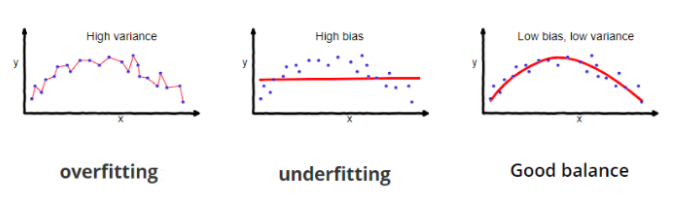

##History Table for LR

Και εδώ όπως και στους άλλους δύο ταξινομητές χρησιμοποιήσαμε και τον Standard Scaler και τον MinMax Scaler σε διαφορετικά Pipes καθώς και οι δύο ήταν πολύ κοντα σε τιμές. Το ίδιο κάναμε με το ROS και το SMOTE τα οποία χρησιμοποιήθηκαν και αυτά σε διαφορετικά pipes. Επίσης χρησιμοποιήθηκε η Variance Threshold.  Όπότε το pipe με βελτιώση ως προς macro ήταν στην παρακάτω δομή.

> $$ Pipe (macro) : variance\ threshold -> Standard/Minmax scaler ->ROS/Smote -> pca -> GaussianNB $$
>$$$$


Χρησιμοποιήσαμε τις παρακάτω τιμες για τις παραμέτρους:


**threshold = [0, 0.1, 0.15, 0.2, 0.25, 0.3]**

**threshold_minmax = [0, 0.1, 0.15, 0.2, 0.25]**

**n_components = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34]**

**n_components_minmax = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34]**


Εφόσον υπολογίσαμε όλα τα παραπάνω βρήκαμε πως τνη καλύτερη τιμη score την εντοπίζουμε για τιμές:
$$$$
$$macro:\ pca\ components = 18\ variance\ threshold = 0\ και\ με\ χρήση\ StandardScaler\ και\ Smote\ ,δίνοντας\ στο\ train :$$

$$f1\ macro\ score = 0.837\ ,   με\ χρόνο\ 1202s$$ 

\

$$accuracy:\ pca\ components = 18\ variance\ threshold = 0\ και\ με\ StandardScaler\ και\ Smote\ ,δίνοντας\ στο\ train :$$

$$*accuracy\  score = 0.848\,   με\ χρόνο\ 11.77s$$ 

Eκτελώντας την predict μέθοδο στο test set πλέον παίρνουμε ότι η απόδοση μας στο test set για micro optimization και accuracy ,αντίστιοιχα, του Knn είναι:

$$macro\ optimized:$$
$$f1\ score = 0.841$$       $$accuracy\ score = 0.856$$


$$accuracy\ optimized:$$
$$f1\ score = 0.826$$       $$accuracy\ score = 0.851$$

Στην περίπτωση του LR, παρατηρούμε οτι ως προς macro, παίρνουμε καλύτερα αποτελέσματα στο predict σε σχέση με το accurracy.
Παρατηρούμε, επίσης, ότι πήραμε αρκετά μεγαλύτερο score απο αυτό που βρήκαμε στο out of the box set. Φαίνεται πως οι μετατροπές που κάναμε στις παραμέτρους του Logistic Regression είχαν αποτέλεσμα, πολύ μεγαλύτερο από ότι σε άλλους ταξινομητές. Αυτό οφείλεται στο ότι ο Logistic Regression είναι πιο περίπλοκος και μια βελτιστοποιήση των παραμέτρων του είναι απαραίτητη.





##Σύγκριση των ταξινομητών και συμπεράσματα

##Bar Plots

Παρακάτω θα παρουσιάσουμε κάποια bar plots μεταξύ των ταξινομητών που βελτιστοποιήσαμε και θα εξάγουμε κάποια συμπεράσματα για τον βέλτιστο ταξινομητή βάσει των παραμέτρων που επεξεργαστήκαμε.

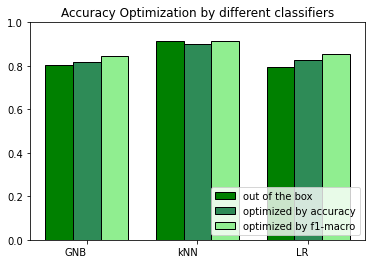

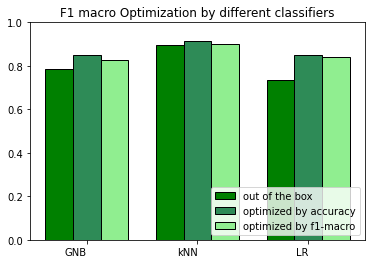

In [ ]:
accuracy = [0.806, 0.913, 0.795]
accuracy_optimed_by_acc = [0.818,  0.899, 0.826]
accuracy_optimed_by_f1 = [0.843, 0.914, 0.856]

scoref1 = [0.784, 0.896, 0.734]
scoref1_optimed_by_acc = [0.848,  0.913, 0.851]
scoref1_optimed_by_f1 = [0.825, 0.902, 0.841]


print_plot_optimize(accuracy, accuracy_optimed_by_acc, accuracy_optimed_by_f1, 'Accuracy')
print_plot_optimize(scoref1, scoref1_optimed_by_acc, scoref1_optimed_by_f1, 'F1 macro')

##Confusion Matrixes

Ο χειρότερος ταξινομητής, εξαιρουμένων των dummies, ήταν ο Logistic Regression με out-of-the-box παραμέτρους και ο καλύτερος ήταν ο Optimized Knn. Έτσι, παρακάτω έχουμε τους δύο confusion matrixes των δύο αυτών ταξινομητών αντίστοιχα.

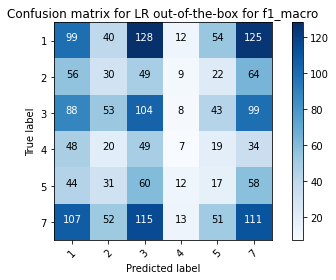

In [ ]:
cm_LR_out_of_the_box_macro = confusion_matrix(y_test, lr.predict(test))
plot_confusion_matrix(cm_LR_out_of_the_box_macro, np.unique(y_train), title = 'Confusion matrix for LR out-of-the-box for f1_macro')

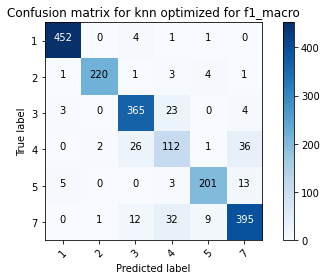

In [ ]:
cm_knn_opt_macro = confusion_matrix(y_test, kNN_macro_best_estimator.predict(X_test))
plot_confusion_matrix(cm_knn_opt_macro, np.unique(y_train), title = 'Confusion matrix for knn optimized for f1_macro')

#Καλύτερος ταξινομητής

Ο knn classifier θα είναι αυτός που θα επιλέξουμε για το dataset που μας έχει δοθεί κα΄θως αυτός είναι που παρουσιάζει τα υψηλότερα score τόσο στο train όσο και στο test set. Αυτό οφείλεται στο ότι, ο knn λειτουργεί καλύτερα σε μικρά dataset και λειτουγεί πολύ καλύτερα από τον Logistic Regression, όταν έχουμε υψηλό SNR, δηλαδή έχουμε features τα οποία έχουν μεγάλη απόκλιση μεταξύ τους, φαινόμενο το οποίο ο Knn είναι σε θέση να εξισορροπήσει με μεγαλύτερη επιτυχία. <br>